In [57]:
%run ../../__init__.py
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
htune_dir = "/home/konstantin/personal/Summertime/runs/htune/imcpt/"
evaluation_task = eva_ns.REL_POSE

In [59]:
methods = {
    'shi_disk': {eva_ns.COLOR: 'lightskyblue',  
                 eva_ns.LINE_STYLE: '-.',
                 eva_ns.ALIAS: 'Shi-Tomasi+DISK'},
    
    'sift_disk': {eva_ns.COLOR: 'orange',
                  eva_ns.LINE_STYLE: '-',
                  eva_ns.ALIAS: 'SIFT+DISK'},
    
    'superpoint_disk': {eva_ns.COLOR: 'gold',
                        eva_ns.LINE_STYLE: '-',
                        eva_ns.ALIAS: 'SuperPoint+DISK'},
    
    'r2d2_disk': {eva_ns.COLOR: 'blue',
                  eva_ns.LINE_STYLE: '-',
                  eva_ns.ALIAS: 'R2D2+DISK'},
    
    'keynet_disk': {eva_ns.COLOR: 'red',
                    eva_ns.LINE_STYLE: '-',
                    eva_ns.ALIAS: 'KeyNet+DISK'},
    
    'disk': {eva_ns.COLOR: 'purple',
             eva_ns.LINE_STYLE: '-',
             eva_ns.ALIAS: 'DISK'},
    
    'rekd_disk': {eva_ns.COLOR: 'hotpink',
                  eva_ns.LINE_STYLE: '-',
                  eva_ns.ALIAS: 'REKD+DISK'},
    
    'shiness_disk': {eva_ns.COLOR: 'cyan',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'NeSS-ST+DISK'},
}

In [60]:
methods_disk_f_pydegensac = {
    eva_ns.BACKEND: 'f_pydegensac/2k',
    eva_ns.EVAL_TAG: eva_ns.ICCV2023_EVAL_TAG,
    
    eva_ns.METHODS: methods,
    
    eva_ns.PLOT_PARAMS: {
        eva_ns.PLOT_TITLE: 'HParam tuning. PyDEGENSAC, DISK',
        
        eva_ns.LOWE_RATIO: {
            eva_ns.SAVE_DIR: 'figures/htune',
            eva_ns.SAVE_NAME: 'lowe_ratio.pdf',
            
            eva_ns.LEGEND_LOC: ['lower left', 'lower left'],
        },
        
        eva_ns.INL_THRESH: {
            eva_ns.SAVE_DIR: 'figures/htune',
            eva_ns.SAVE_NAME: 'inl_thresh.pdf',
            
            eva_ns.LEGEND_LOC: ['lower left', 'upper right'],
        }
    }
}

In [61]:
from source.evaluation.vis import prepare_methods_list

save = False
# save = True

select = None

methods_list = prepare_methods_list([methods_disk_f_pydegensac], select)

### Lowe ratio tuning

In [62]:
from source.evaluation.rel_pose.logging import load_rel_pose_htune

mAA_list, thresh_list = load_rel_pose_htune(htune_dir, evaluation_task,
                                            methods_list, eva_ns.LOWE_RATIO)

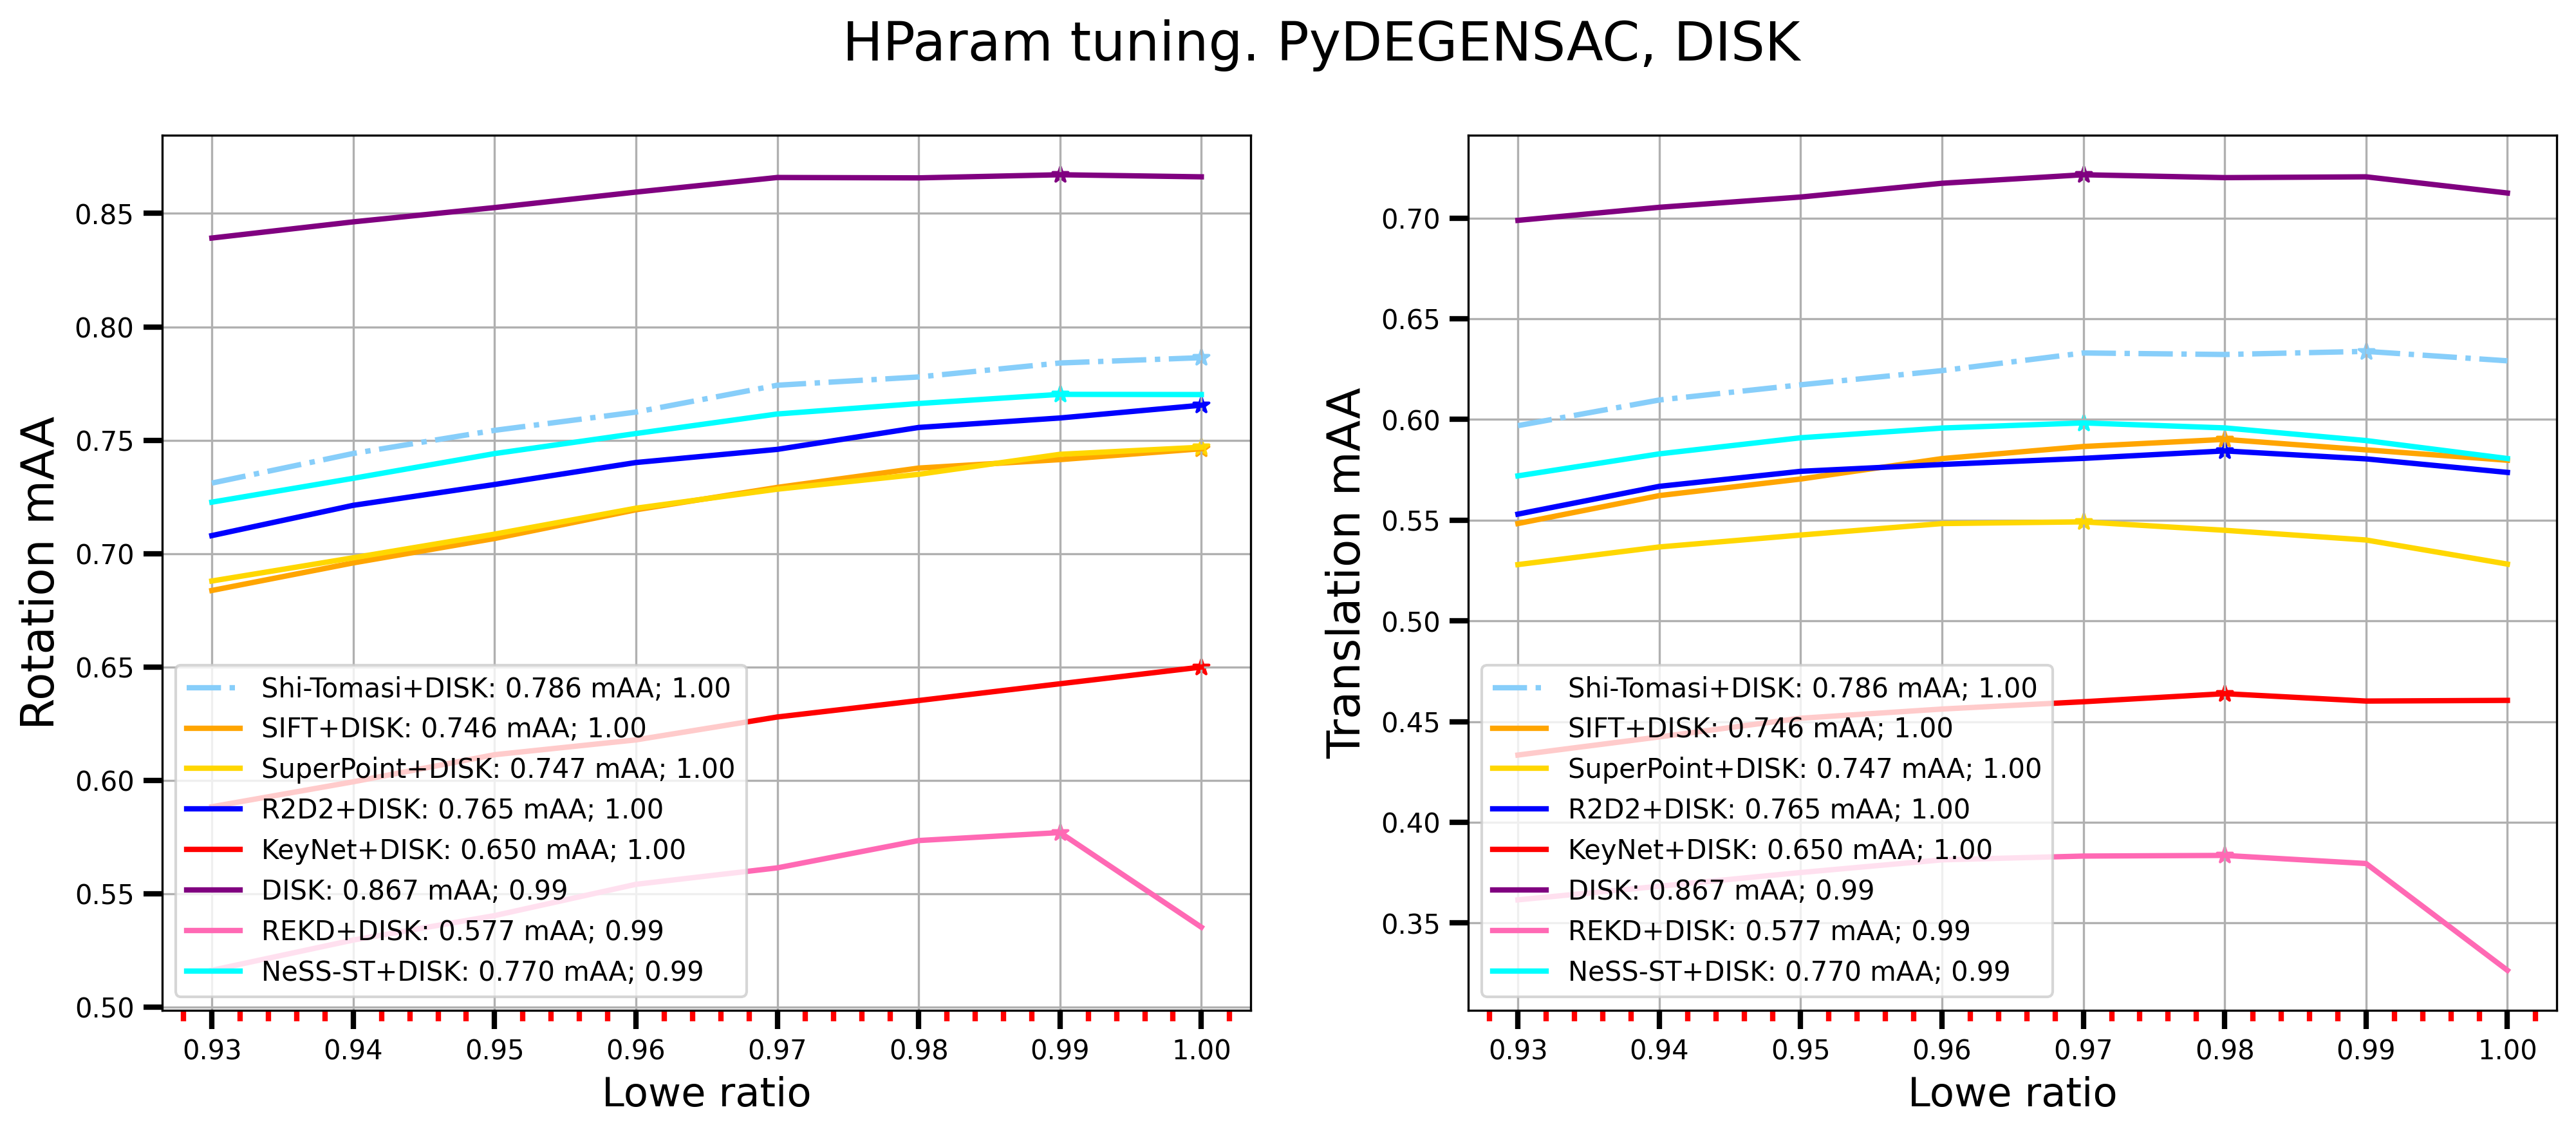

In [63]:
from source.evaluation.rel_pose.vis import HTuneRelPosemAAPlotter

vis_indices = None

HTuneRelPosemAAPlotter(methods_list,
                       eva_ns.LOWE_RATIO,
                       mAA_list, thresh_list,
                       vis_indices).plot_all(save)

In [64]:
from source.evaluation.rel_pose.vis import print_best_threshold

print_best_threshold(methods_list, eva_ns.LOWE_RATIO, mAA_list, thresh_list)

HParam tuning. PyDEGENSAC, DISK
	 Shi-Tomasi+DISK: Lowe ratio is 0.99.
	 R: 0.784 mAA, T: 0.634 mAA

	 SIFT+DISK: Lowe ratio is 0.98.
	 R: 0.738 mAA, T: 0.590 mAA

	 SuperPoint+DISK: Lowe ratio is 0.99.
	 R: 0.744 mAA, T: 0.540 mAA

	 R2D2+DISK: Lowe ratio is 0.99.
	 R: 0.760 mAA, T: 0.580 mAA

	 KeyNet+DISK: Lowe ratio is 1.0.
	 R: 0.650 mAA, T: 0.461 mAA

	 DISK: Lowe ratio is 0.99.
	 R: 0.867 mAA, T: 0.720 mAA

	 REKD+DISK: Lowe ratio is 0.98.
	 R: 0.573 mAA, T: 0.384 mAA

	 NeSS-ST+DISK: Lowe ratio is 0.98.
	 R: 0.766 mAA, T: 0.596 mAA



### Inlier threshold tuning

In [65]:
from source.evaluation.rel_pose.logging import load_rel_pose_htune

mAA_list, thresh_list = load_rel_pose_htune(htune_dir, evaluation_task,
                                            methods_list, eva_ns.INL_THRESH)

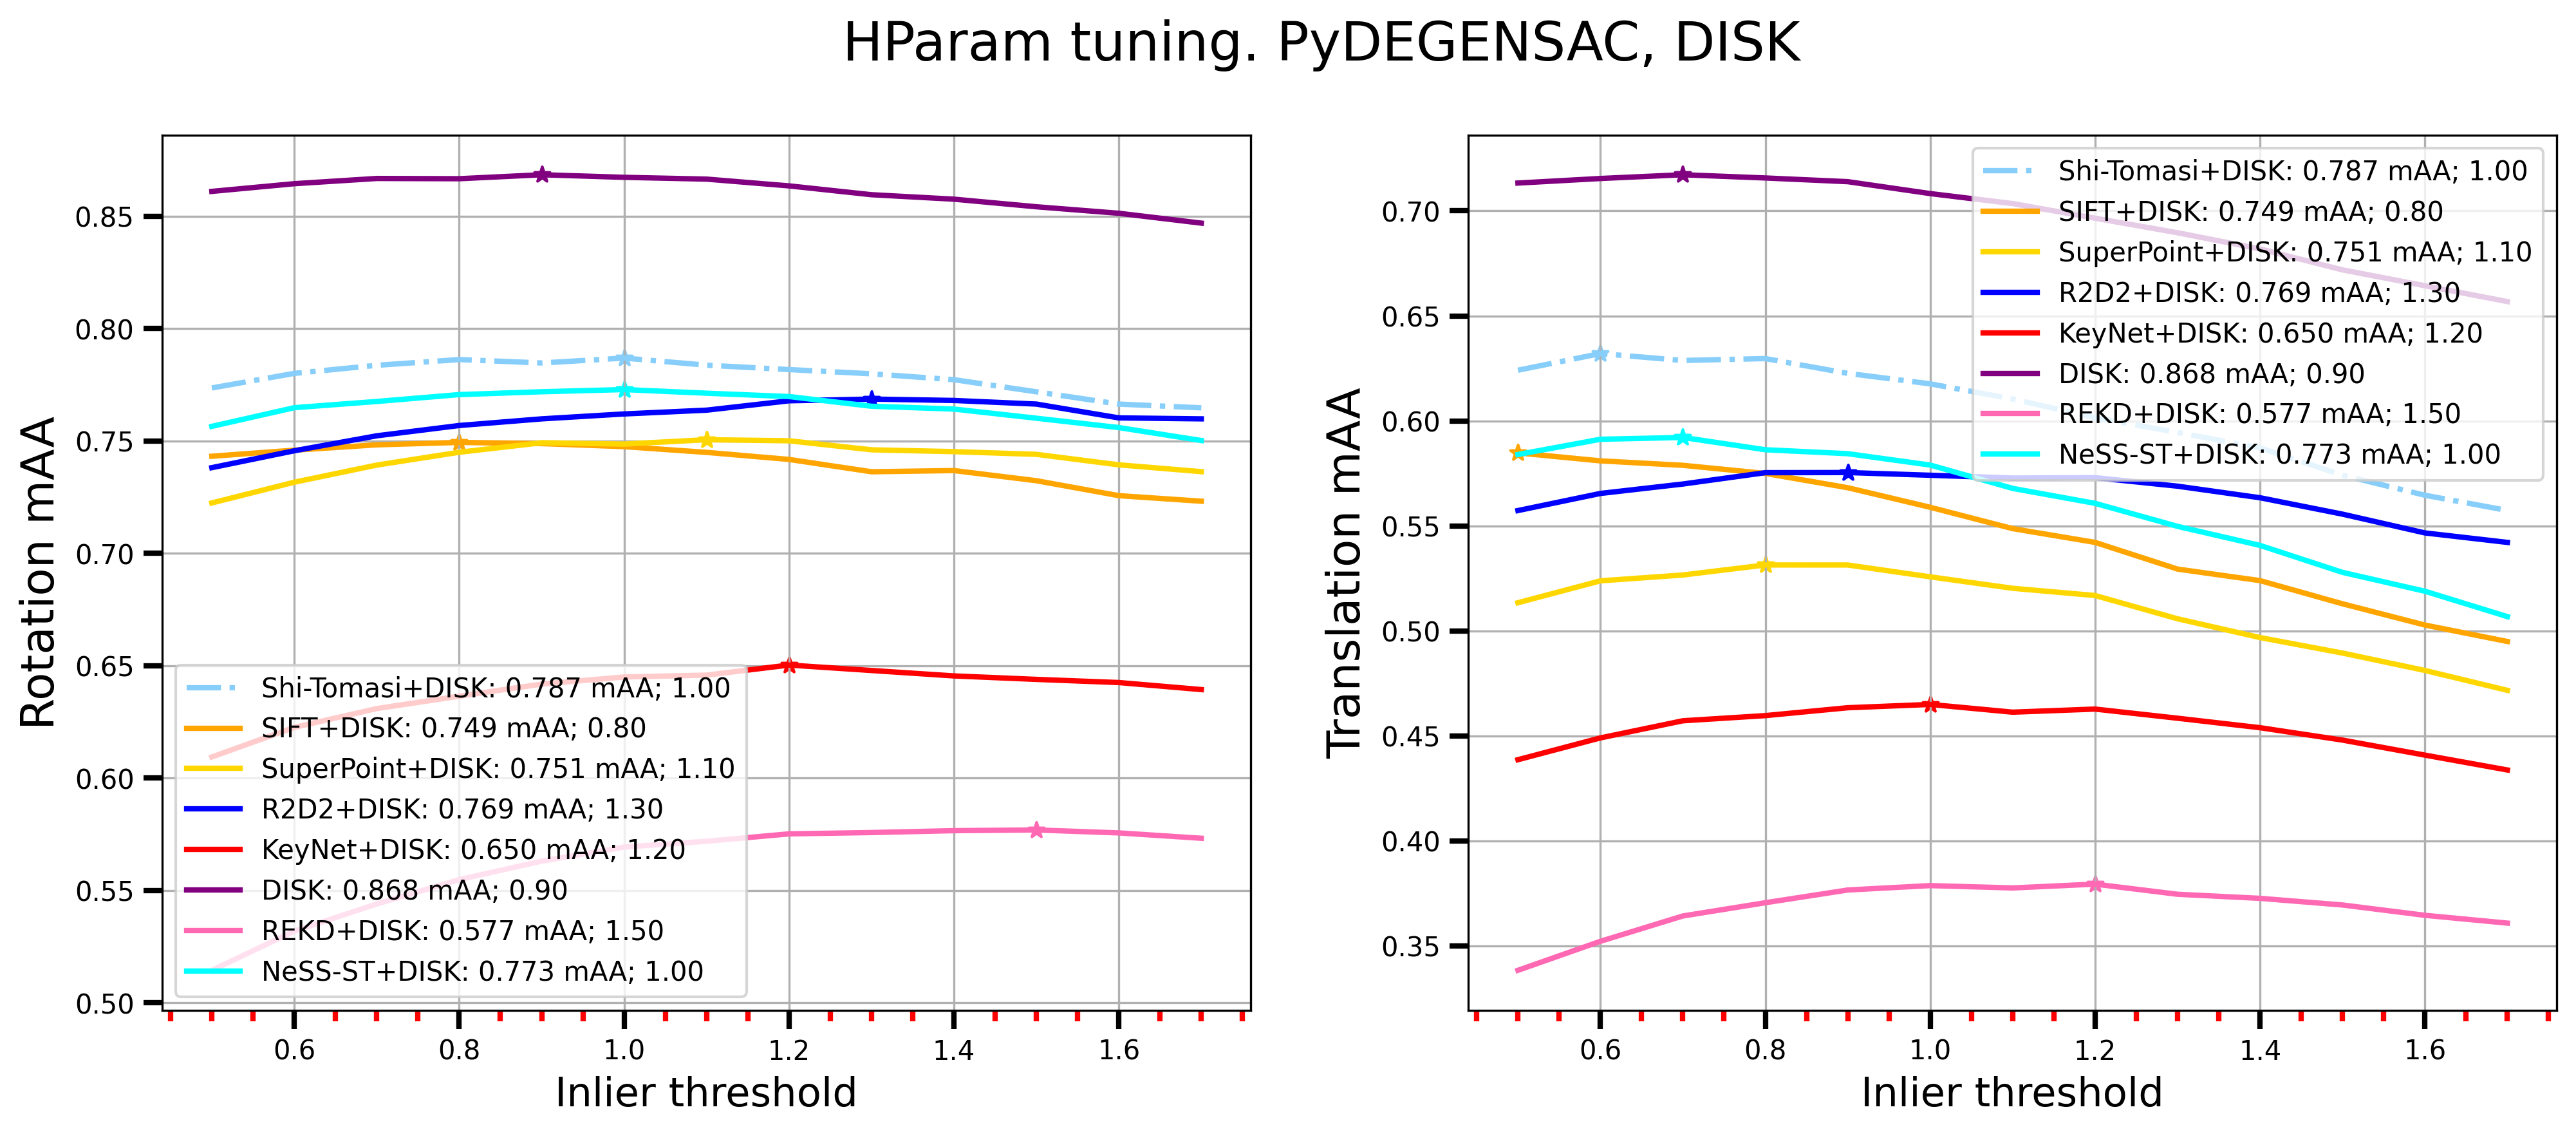

In [66]:
from source.evaluation.rel_pose.vis import HTuneRelPosemAAPlotter

HTuneRelPosemAAPlotter(methods_list,
                       eva_ns.INL_THRESH, 
                       mAA_list, thresh_list,
                       vis_indices).plot_all(save)

In [67]:
from source.evaluation.rel_pose.vis import print_best_threshold

print_best_threshold(methods_list, eva_ns.INL_THRESH,
                     mAA_list, thresh_list)

HParam tuning. PyDEGENSAC, DISK
	 Shi-Tomasi+DISK: Inlier threshold is 0.8.
	 R: 0.786 mAA, T: 0.630 mAA

	 SIFT+DISK: Inlier threshold is 0.5.
	 R: 0.743 mAA, T: 0.585 mAA

	 SuperPoint+DISK: Inlier threshold is 0.9.
	 R: 0.749 mAA, T: 0.531 mAA

	 R2D2+DISK: Inlier threshold is 1.2.
	 R: 0.768 mAA, T: 0.573 mAA

	 KeyNet+DISK: Inlier threshold is 1.2.
	 R: 0.650 mAA, T: 0.463 mAA

	 DISK: Inlier threshold is 0.7.
	 R: 0.867 mAA, T: 0.717 mAA

	 REKD+DISK: Inlier threshold is 1.2.
	 R: 0.575 mAA, T: 0.379 mAA

	 NeSS-ST+DISK: Inlier threshold is 0.7.
	 R: 0.768 mAA, T: 0.592 mAA



# Ablation

## Base detector ablation

In [68]:
base_detector_methods = {
    'shi_disk': {eva_ns.COLOR: 'lightskyblue',  
                 eva_ns.LINE_STYLE: '-.',
                 eva_ns.ALIAS: 'Shi-Tomasi+DISK'},
    
    'harris_disk': {eva_ns.COLOR: 'silver',  
                    eva_ns.LINE_STYLE: '-.',
                    eva_ns.ALIAS: 'Harris+DISK'},
    
    'doh_disk': {eva_ns.COLOR: 'darkorange',  
                 eva_ns.LINE_STYLE: '-.',
                 eva_ns.ALIAS: 'DoH+DISK'},
    
    'log_disk': {eva_ns.COLOR: 'maroon',  
                 eva_ns.LINE_STYLE: '-.',
                 eva_ns.ALIAS: 'LoG+DISK'},
    
    'shiness_disk': {eva_ns.COLOR: 'cyan',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'NeSS-ST+DISK'},
    
    'dohness_disk': {eva_ns.COLOR: 'peru',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'NeSS-DoH+DISK'},
    
    'logness_disk': {eva_ns.COLOR: 'indianred',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'NeSS-LoG+DISK'},
}

In [69]:
base_detector_methods_disk_f_pydegensac = {
    eva_ns.BACKEND: 'f_pydegensac/2k',
    eva_ns.EVAL_TAG: eva_ns.ICCV2023_EVAL_TAG,
    
    eva_ns.METHODS: base_detector_methods,
    
    eva_ns.PLOT_PARAMS: {
        eva_ns.PLOT_TITLE: 'HParam tuning. PyDEGENSAC, DISK',
        
        eva_ns.HTUNE_LOWE_RATIO: {
            eva_ns.SAVE_DIR: 'figures/base_detector/htune',
            eva_ns.SAVE_NAME: 'lowe_ratio_disk.pdf',
            
            eva_ns.LEGEND_LOC: ['lower left', 'lower left'],
        },
        
        eva_ns.HTUNE_INL_THRESH: {
            eva_ns.SAVE_DIR: 'figures/base_detector/htune',
            eva_ns.SAVE_NAME: 'inl_thresh_disk.pdf',
            
            eva_ns.LEGEND_LOC: ['lower left', 'lower left'],
        }
    }
}

In [70]:
from source.evaluation.vis import prepare_methods_list

save = False
# save = True

select = None

methods_list = prepare_methods_list([base_detector_methods_disk_f_pydegensac], select)

### Lowe ratio tuning

In [71]:
from source.evaluation.rel_pose.logging import load_rel_pose_htune

mAA_list, thresh_list = load_rel_pose_htune(htune_dir, evaluation_task,
                                            methods_list, eva_ns.LOWE_RATIO)

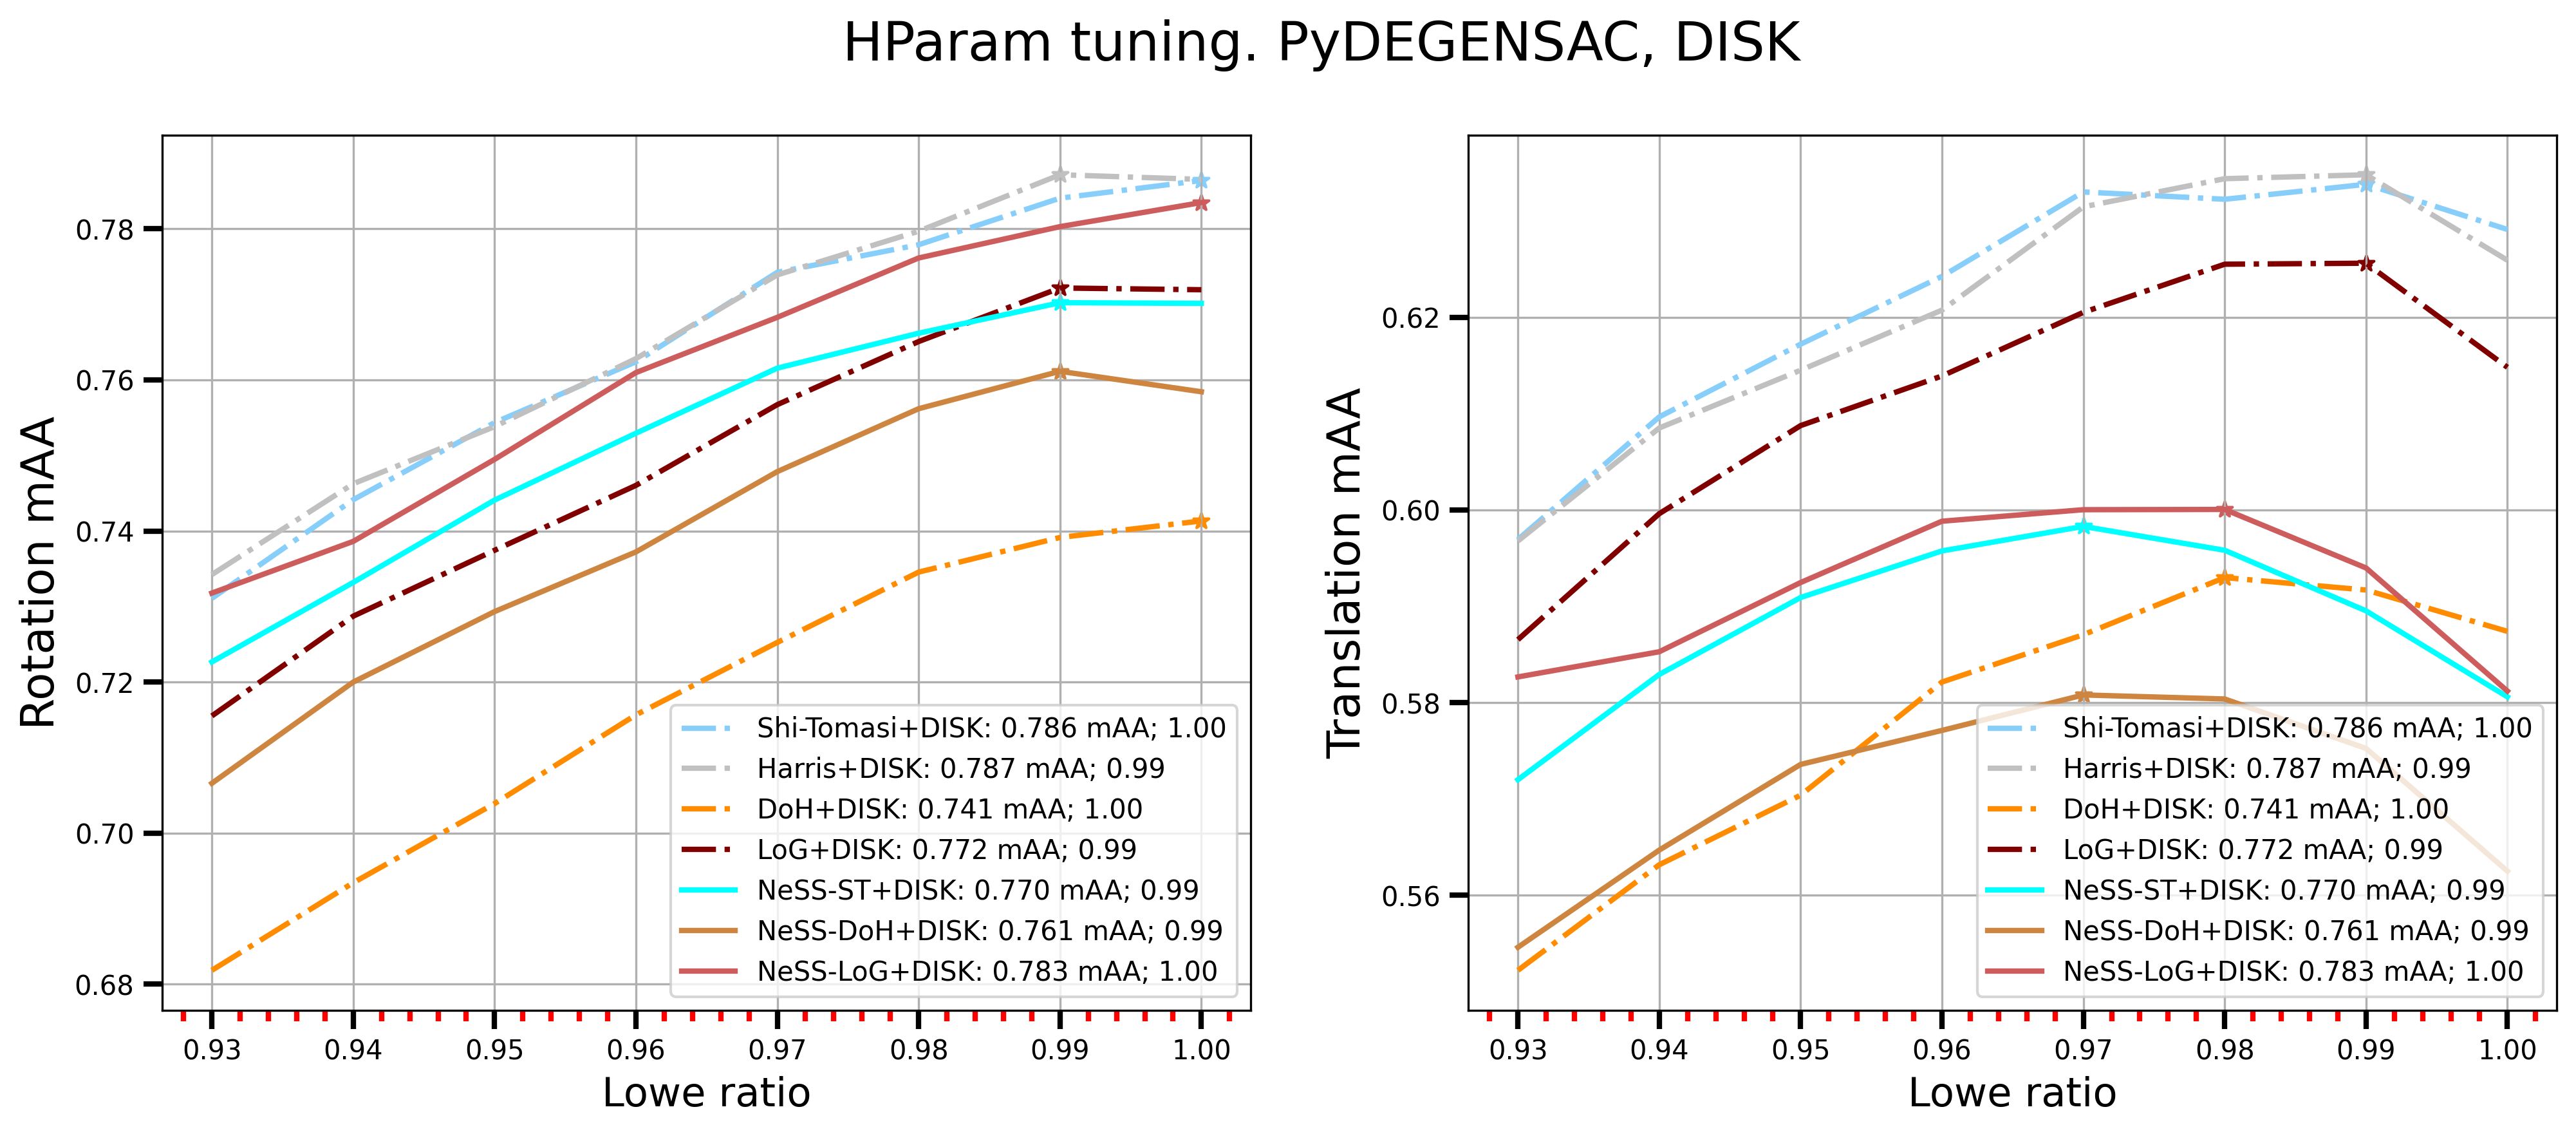

In [72]:
from source.evaluation.rel_pose.vis import HTuneRelPosemAAPlotter

vis_indices = None

HTuneRelPosemAAPlotter(methods_list,
                       eva_ns.LOWE_RATIO,
                       mAA_list, thresh_list,
                       vis_indices).plot_all(save)

In [73]:
from source.evaluation.rel_pose.vis import print_best_threshold

print_best_threshold(methods_list, eva_ns.LOWE_RATIO, mAA_list, thresh_list)

HParam tuning. PyDEGENSAC, DISK
	 Shi-Tomasi+DISK: Lowe ratio is 0.99.
	 R: 0.784 mAA, T: 0.634 mAA

	 Harris+DISK: Lowe ratio is 0.99.
	 R: 0.787 mAA, T: 0.635 mAA

	 DoH+DISK: Lowe ratio is 0.99.
	 R: 0.739 mAA, T: 0.592 mAA

	 LoG+DISK: Lowe ratio is 0.99.
	 R: 0.772 mAA, T: 0.626 mAA

	 NeSS-ST+DISK: Lowe ratio is 0.98.
	 R: 0.766 mAA, T: 0.596 mAA

	 NeSS-DoH+DISK: Lowe ratio is 0.98.
	 R: 0.756 mAA, T: 0.580 mAA

	 NeSS-LoG+DISK: Lowe ratio is 0.98.
	 R: 0.776 mAA, T: 0.600 mAA



### Inlier threshold tuning

In [74]:
from source.evaluation.rel_pose.logging import load_rel_pose_htune

mAA_list, thresh_list = load_rel_pose_htune(htune_dir, evaluation_task,
                                            methods_list, eva_ns.INL_THRESH)

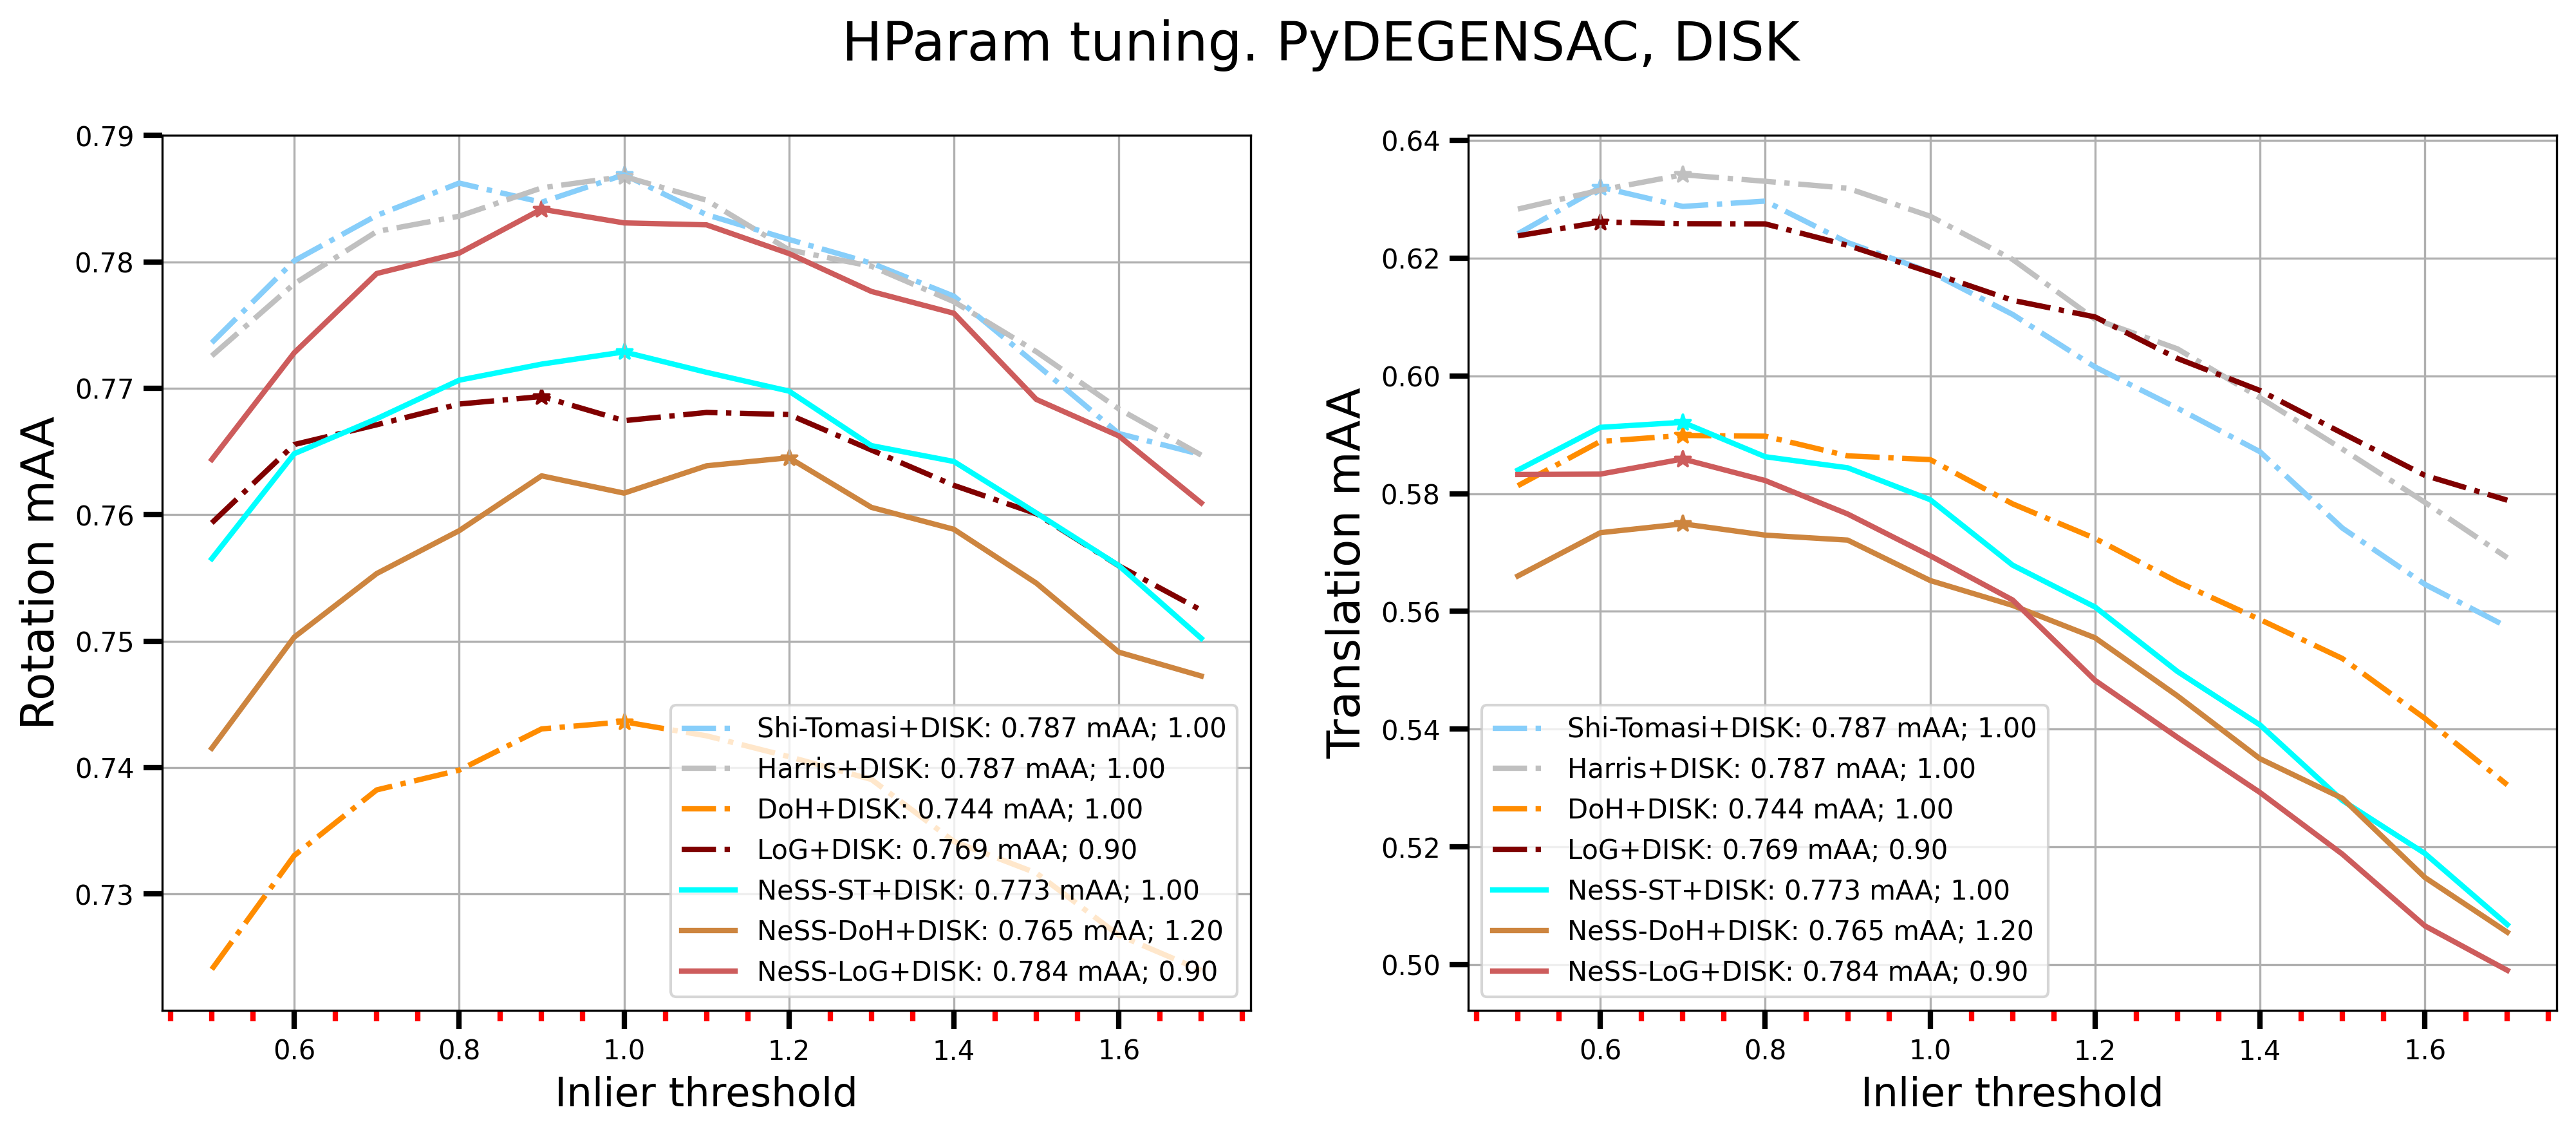

In [75]:
from source.evaluation.rel_pose.vis import HTuneRelPosemAAPlotter

HTuneRelPosemAAPlotter(methods_list,
                       eva_ns.INL_THRESH,
                       mAA_list, thresh_list,
                       vis_indices).plot_all(save)

In [76]:
from source.evaluation.rel_pose.vis import print_best_threshold

print_best_threshold(methods_list, eva_ns.INL_THRESH, mAA_list, thresh_list)

HParam tuning. PyDEGENSAC, DISK
	 Shi-Tomasi+DISK: Inlier threshold is 0.8.
	 R: 0.786 mAA, T: 0.630 mAA

	 Harris+DISK: Inlier threshold is 0.9.
	 R: 0.786 mAA, T: 0.632 mAA

	 DoH+DISK: Inlier threshold is 0.8.
	 R: 0.740 mAA, T: 0.590 mAA

	 LoG+DISK: Inlier threshold is 0.8.
	 R: 0.769 mAA, T: 0.626 mAA

	 NeSS-ST+DISK: Inlier threshold is 0.7.
	 R: 0.768 mAA, T: 0.592 mAA

	 NeSS-DoH+DISK: Inlier threshold is 0.9.
	 R: 0.763 mAA, T: 0.572 mAA

	 NeSS-LoG+DISK: Inlier threshold is 0.7.
	 R: 0.779 mAA, T: 0.586 mAA



## SS, RS, NeSS and NeRS ablation

In [77]:
ss_rs_methods = {    
    'shi_disk': {eva_ns.COLOR: 'lightskyblue',  
                 eva_ns.LINE_STYLE: '-.',
                 eva_ns.ALIAS: 'Shi-Tomasi+DISK'},
    
    'shiss_disk': {eva_ns.COLOR: 'coral',
                   eva_ns.LINE_STYLE: '--',
                   eva_ns.ALIAS: 'SS-ST+DISK'},
    
    'shirs_disk': {eva_ns.COLOR: 'linen',
                   eva_ns.LINE_STYLE: '--',
                   eva_ns.ALIAS: 'RS-ST+DISK'},
    
    'shiness_disk': {eva_ns.COLOR: 'cyan',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'NeSS-ST+DISK'},
    
    'shiners_disk': {eva_ns.COLOR: 'lavender',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'NeRS-ST+DISK'}
}

In [78]:
ss_rs_methods_disk_f_pydegensac = {
    eva_ns.BACKEND: 'f_pydegensac/2k',
    eva_ns.EVAL_TAG: eva_ns.ICCV2023_EVAL_TAG,
    
    eva_ns.METHODS: ss_rs_methods,
    
    eva_ns.PLOT_PARAMS: {
        eva_ns.PLOT_TITLE: 'HParam tuning. PyDEGENSAC, DISK',
        
        eva_ns.HTUNE_LOWE_RATIO: {
            eva_ns.SAVE_DIR: 'figures/htune/ss_rs',
            eva_ns.SAVE_NAME: 'lowe_ratio_disk.pdf',
            
            eva_ns.LEGEND_LOC: ['lower left', 'lower left'],
        },
        
        eva_ns.HTUNE_INL_THRESH: {
            eva_ns.SAVE_DIR: 'figures/htune/ss_rs',
            eva_ns.SAVE_NAME: 'inl_thresh_disk.pdf',
            
            eva_ns.LEGEND_LOC: ['lower left', 'lower left'],
        }
    }
}

In [79]:
from source.evaluation.vis import prepare_methods_list

save = False
# save = True

select = None

methods_list = prepare_methods_list([ss_rs_methods_disk_f_pydegensac], select)

### Lowe ratio tuning

In [80]:
from source.evaluation.rel_pose.logging import load_rel_pose_htune

mAA_list, thresh_list = load_rel_pose_htune(htune_dir, evaluation_task,
                                            methods_list, eva_ns.LOWE_RATIO)

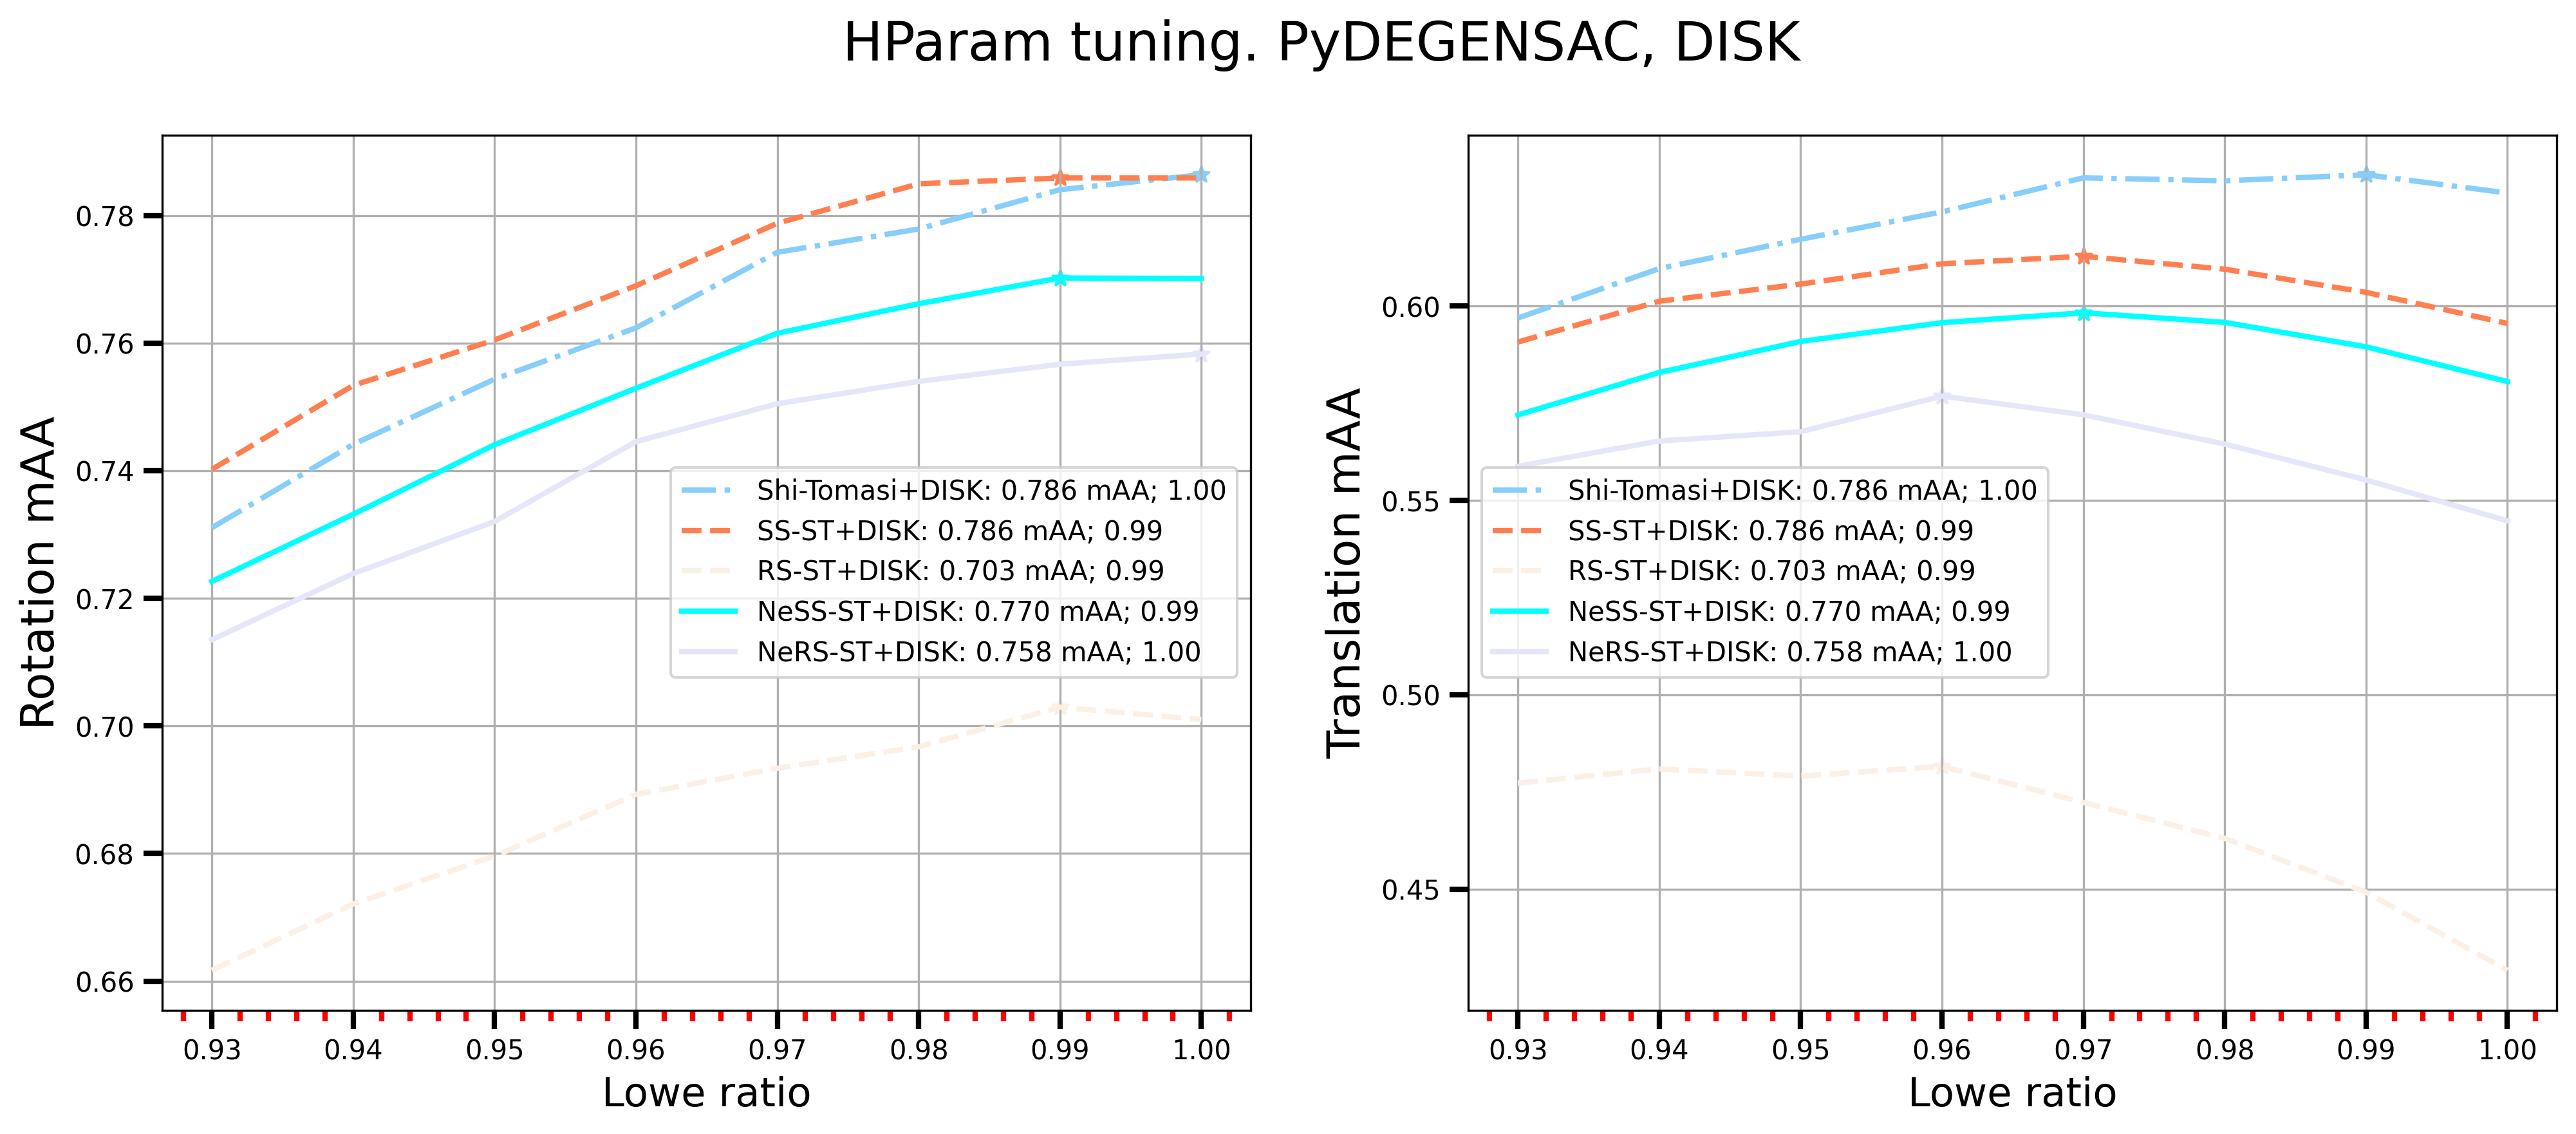

In [81]:
from source.evaluation.rel_pose.vis import HTuneRelPosemAAPlotter

vis_indices = None

HTuneRelPosemAAPlotter(methods_list,
                       eva_ns.LOWE_RATIO,
                       mAA_list, thresh_list,
                       vis_indices).plot_all(save)

In [82]:
from source.evaluation.rel_pose.vis import print_best_threshold

print_best_threshold(methods_list, eva_ns.LOWE_RATIO, mAA_list, thresh_list)

HParam tuning. PyDEGENSAC, DISK
	 Shi-Tomasi+DISK: Lowe ratio is 0.99.
	 R: 0.784 mAA, T: 0.634 mAA

	 SS-ST+DISK: Lowe ratio is 0.98.
	 R: 0.785 mAA, T: 0.610 mAA

	 RS-ST+DISK: Lowe ratio is 0.96.
	 R: 0.689 mAA, T: 0.482 mAA

	 NeSS-ST+DISK: Lowe ratio is 0.98.
	 R: 0.766 mAA, T: 0.596 mAA

	 NeRS-ST+DISK: Lowe ratio is 0.97.
	 R: 0.750 mAA, T: 0.572 mAA



### Inlier threshold tuning

In [83]:
from source.evaluation.rel_pose.logging import load_rel_pose_htune

mAA_list, thresh_list = load_rel_pose_htune(htune_dir, evaluation_task,
                                            methods_list, eva_ns.INL_THRESH)

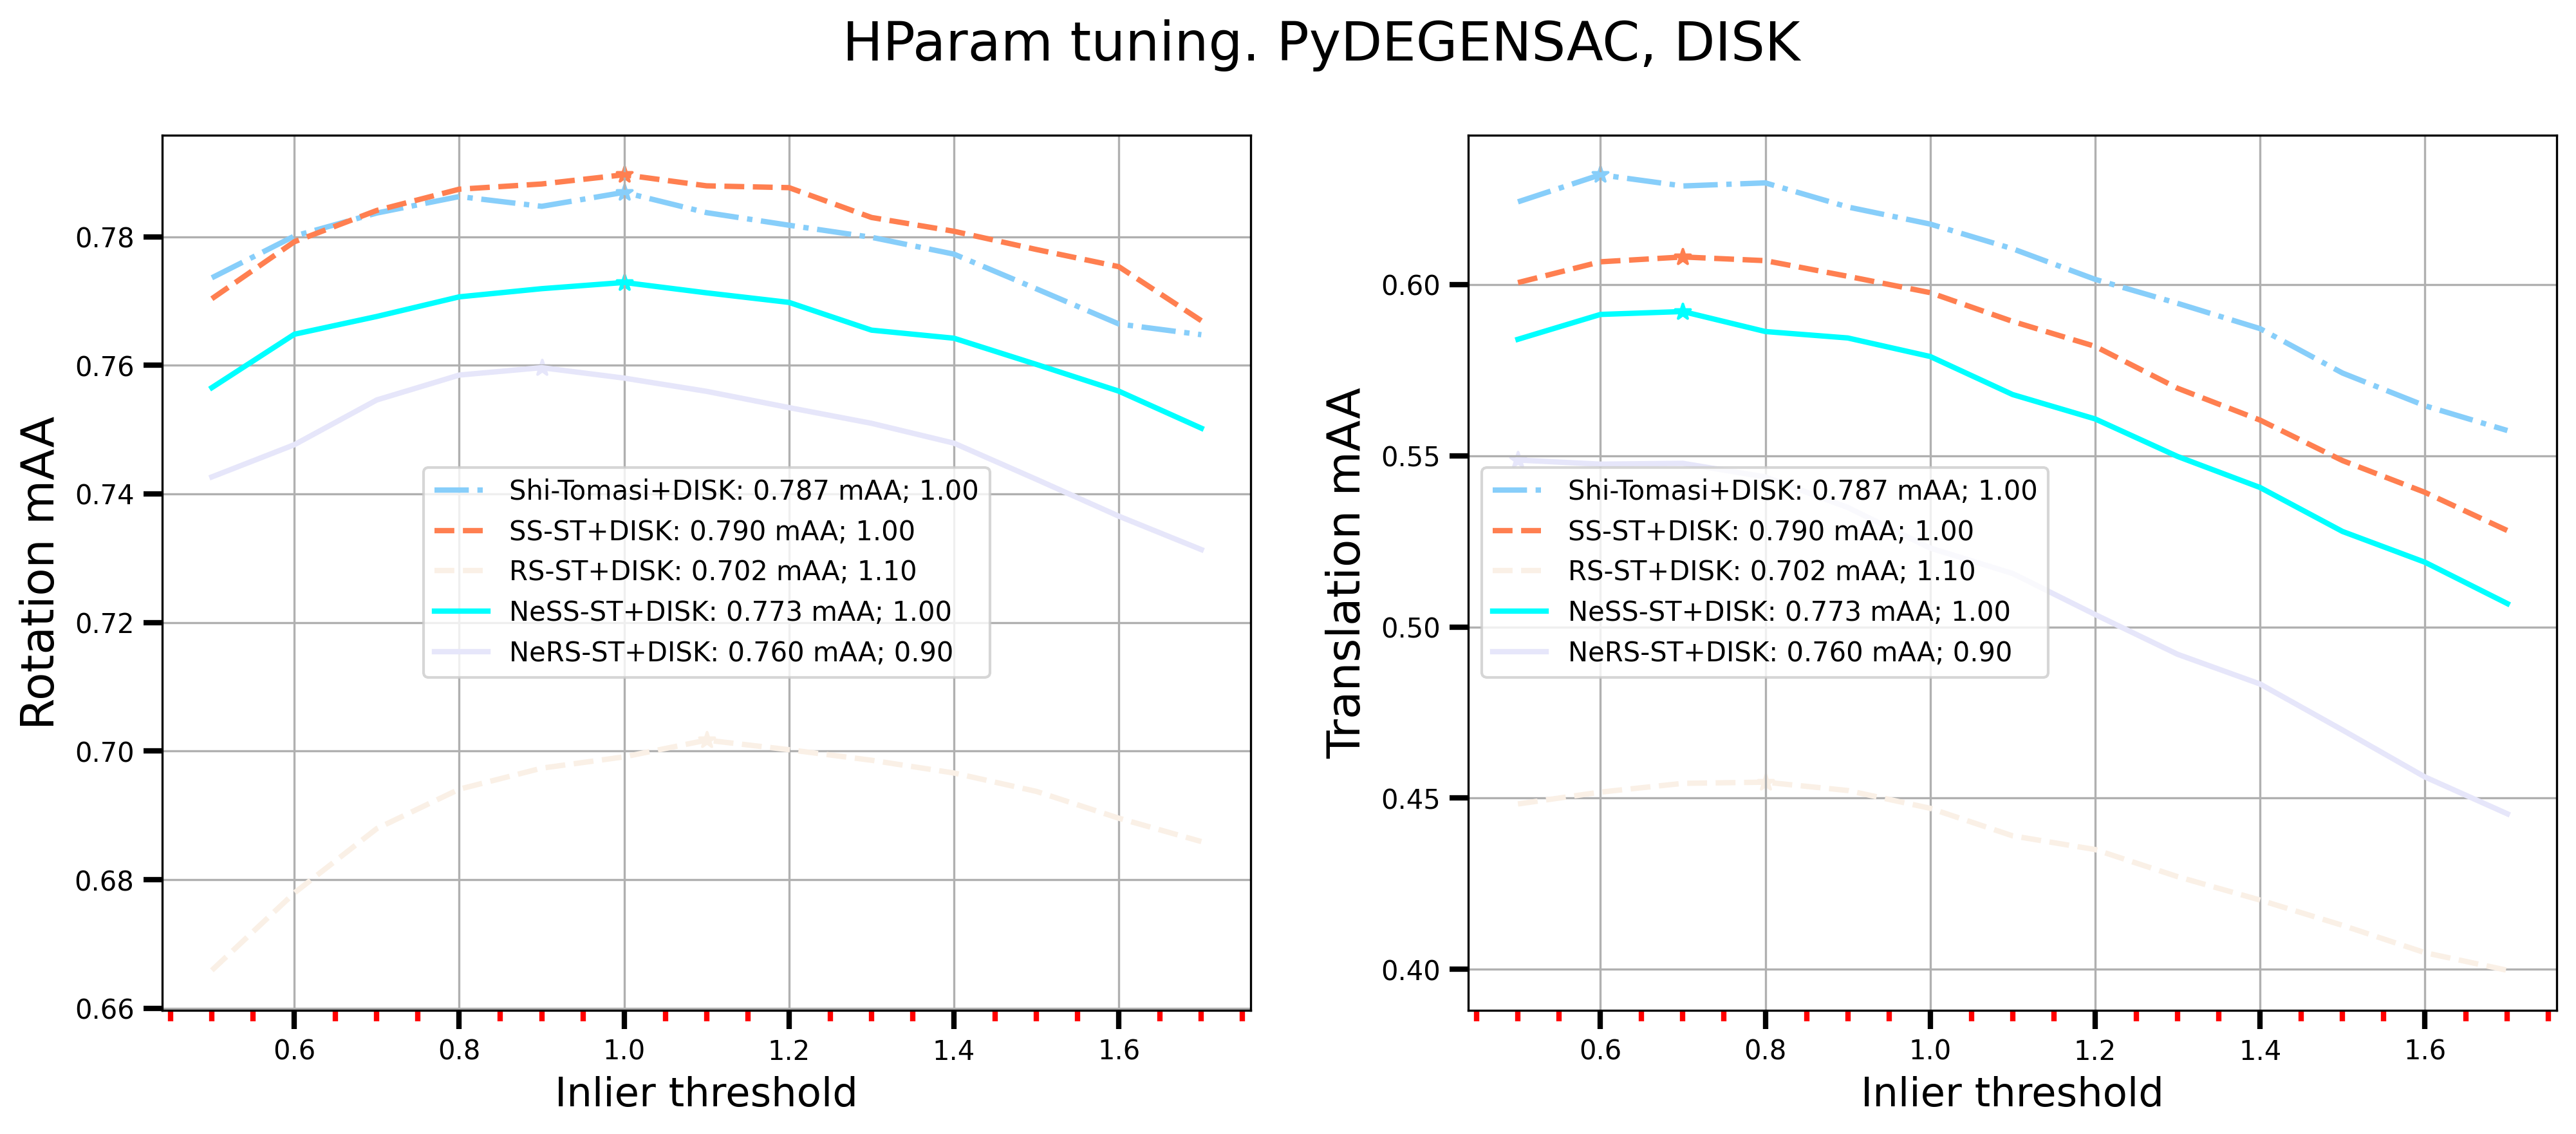

In [84]:
from source.evaluation.rel_pose.vis import HTuneRelPosemAAPlotter

HTuneRelPosemAAPlotter(methods_list,
                       eva_ns.INL_THRESH,
                       mAA_list, thresh_list,
                       vis_indices).plot_all(save)

In [85]:
from source.evaluation.rel_pose.vis import print_best_threshold

print_best_threshold(methods_list, eva_ns.INL_THRESH, mAA_list, thresh_list)

HParam tuning. PyDEGENSAC, DISK
	 Shi-Tomasi+DISK: Inlier threshold is 0.8.
	 R: 0.786 mAA, T: 0.630 mAA

	 SS-ST+DISK: Inlier threshold is 0.8.
	 R: 0.787 mAA, T: 0.607 mAA

	 RS-ST+DISK: Inlier threshold is 0.9.
	 R: 0.697 mAA, T: 0.452 mAA

	 NeSS-ST+DISK: Inlier threshold is 0.7.
	 R: 0.768 mAA, T: 0.592 mAA

	 NeRS-ST+DISK: Inlier threshold is 0.7.
	 R: 0.755 mAA, T: 0.548 mAA



## Number of features ablation

In [86]:
methods_disk_f_pydegensac_128 = {
    eva_ns.BACKEND: 'f_pydegensac/128',
    eva_ns.EVAL_TAG: eva_ns.ICCV2023_EVAL_TAG,
    
    eva_ns.METHODS: methods,
    
    eva_ns.PLOT_PARAMS: {
        eva_ns.PLOT_TITLE: 'HParam tuning. PyDEGENSAC, DISK, 128 features',
        
        eva_ns.HTUNE_LOWE_RATIO: {
            eva_ns.SAVE_DIR: 'figures/htune/num_features/128',
            eva_ns.SAVE_NAME: 'lowe_ratio_disk.pdf',
            
            eva_ns.LEGEND_LOC: ['lower left', 'lower left'],
        },
        
        eva_ns.HTUNE_INL_THRESH: {
            eva_ns.SAVE_DIR: 'figures/htune/num_features/128',
            eva_ns.SAVE_NAME: 'inl_thresh_disk.pdf',
            
            eva_ns.LEGEND_LOC: ['lower left', 'lower left'],
        }
    }
}

In [87]:
methods_disk_f_pydegensac_512 = {
    eva_ns.BACKEND: 'f_pydegensac/512',
    eva_ns.EVAL_TAG: eva_ns.ICCV2023_EVAL_TAG,
    
    eva_ns.METHODS: methods,
    
    eva_ns.PLOT_PARAMS: {
        eva_ns.PLOT_TITLE: 'HParam tuning. PyDEGENSAC, DISK, 512 features',
        
        eva_ns.HTUNE_LOWE_RATIO: {
            eva_ns.SAVE_DIR: 'figures/htune/num_features/512',
            eva_ns.SAVE_NAME: 'lowe_ratio_disk.pdf',
            
            eva_ns.LEGEND_LOC: ['lower left', 'lower left'],
        },
        
        eva_ns.HTUNE_INL_THRESH: {
            eva_ns.SAVE_DIR: 'figures/htune/num_features/512',
            eva_ns.SAVE_NAME: 'inl_thresh_disk.pdf',
            
            eva_ns.LEGEND_LOC: ['lower right', 'lower right'],
        }
    }
}

In [88]:
from source.evaluation.vis import prepare_methods_list

save = False
# save = True

select = None

methods_list = prepare_methods_list([methods_disk_f_pydegensac_128,
                                     methods_disk_f_pydegensac_512], select)

### Lowe ratio tuning

In [89]:
from source.evaluation.rel_pose.logging import load_rel_pose_htune

mAA_list, thresh_list = load_rel_pose_htune(htune_dir, evaluation_task,
                                            methods_list, eva_ns.LOWE_RATIO)

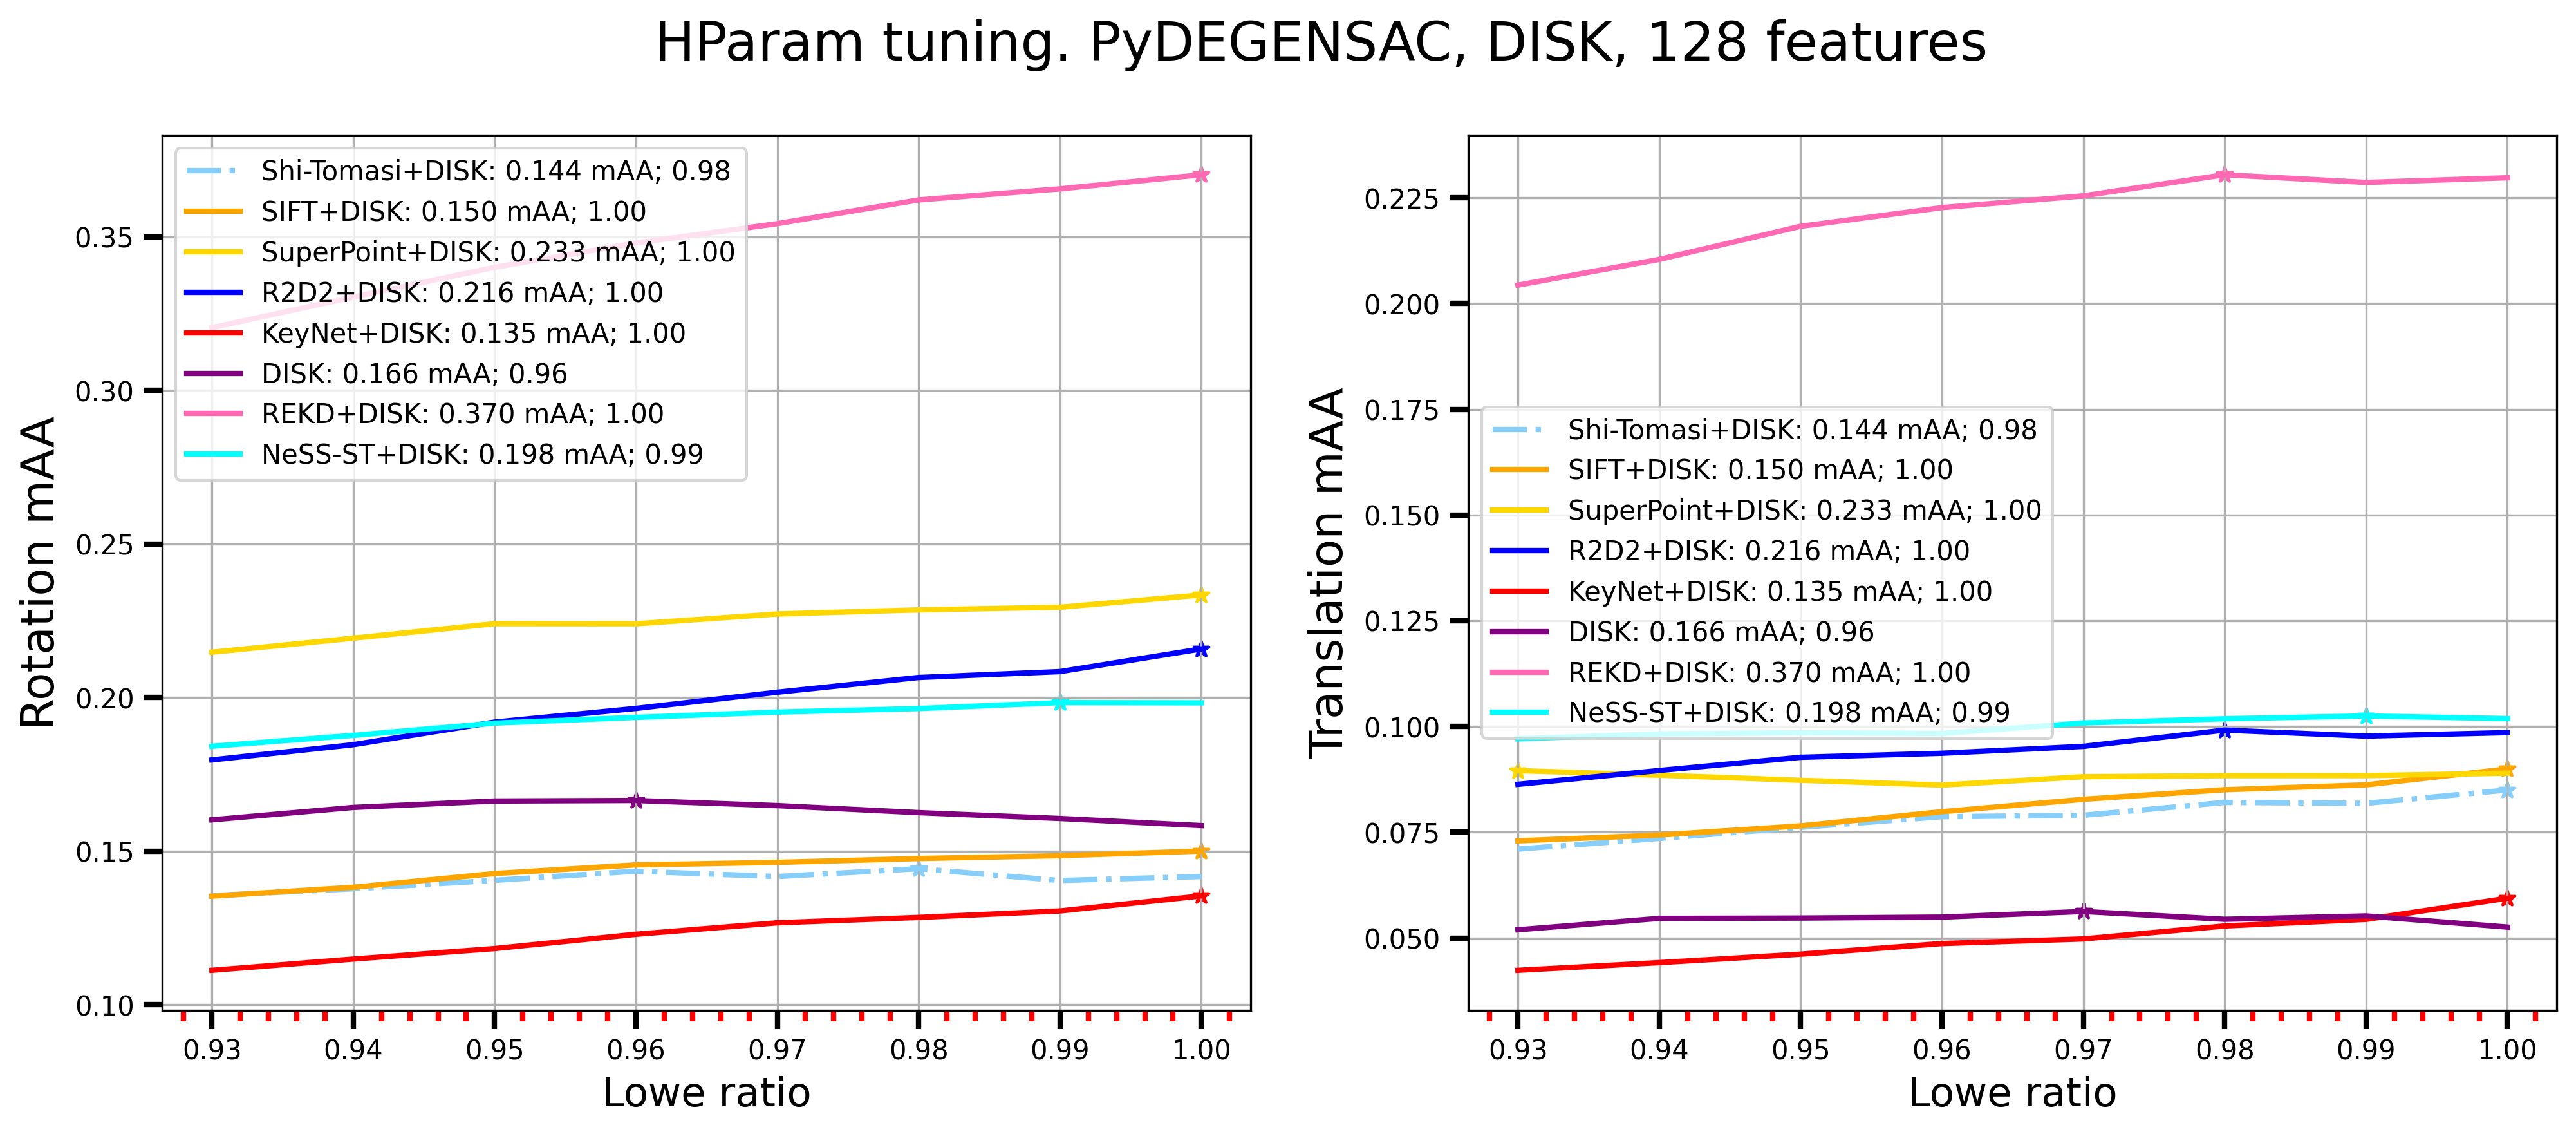

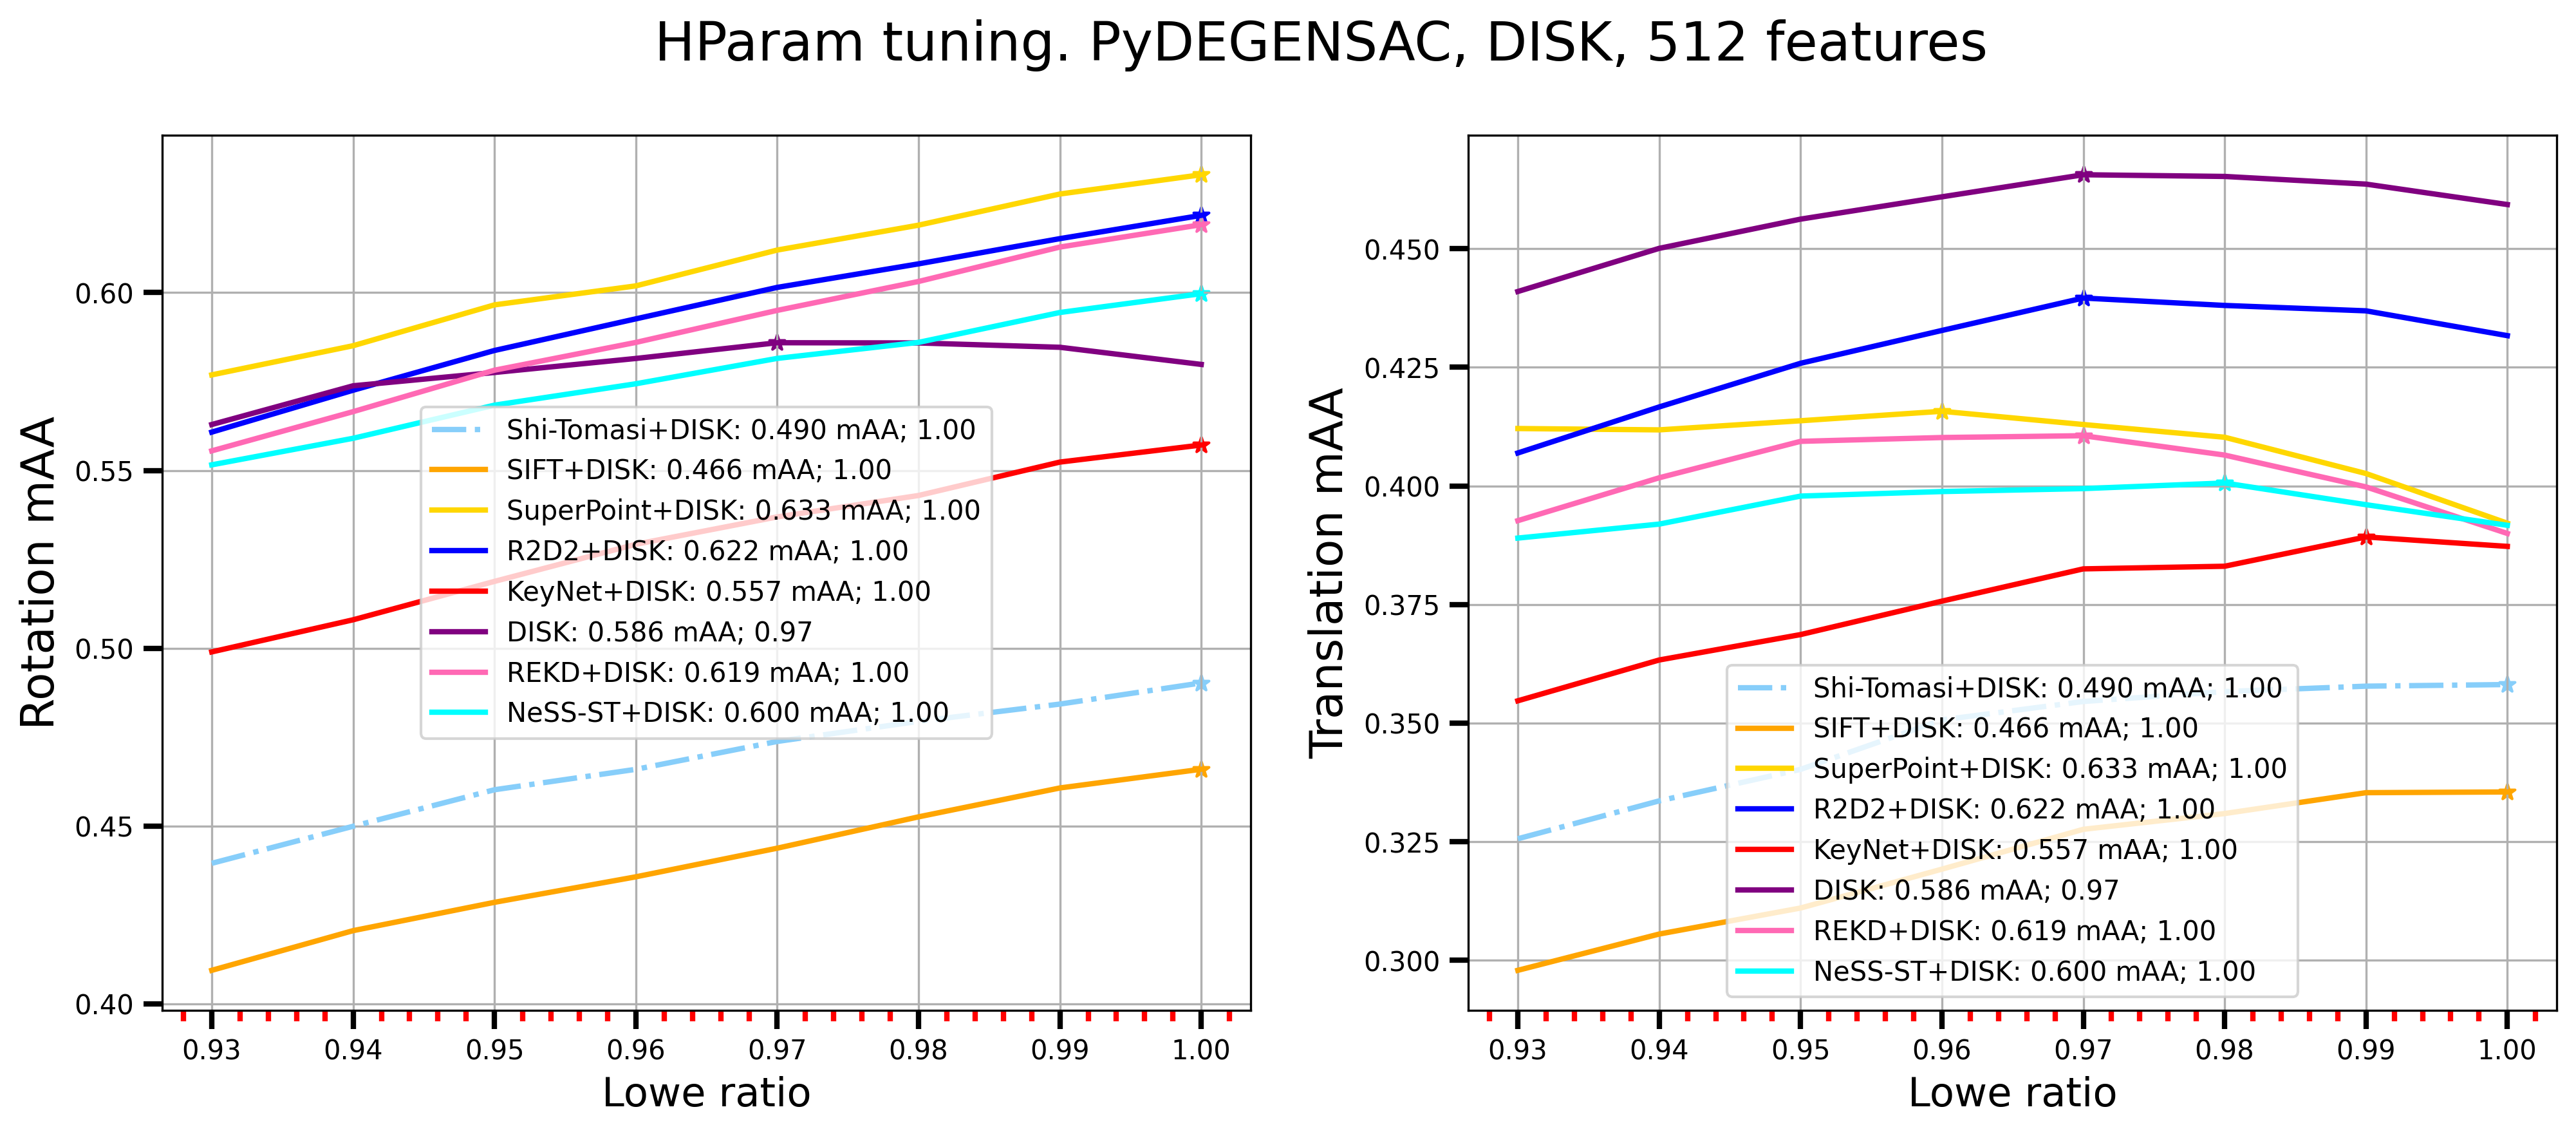

In [90]:
from source.evaluation.rel_pose.vis import HTuneRelPosemAAPlotter

vis_indices = None

HTuneRelPosemAAPlotter(methods_list,
                       eva_ns.LOWE_RATIO,
                       mAA_list, thresh_list,
                       vis_indices).plot_all(save)

In [91]:
from source.evaluation.rel_pose.vis import print_best_threshold

print_best_threshold(methods_list, eva_ns.LOWE_RATIO, mAA_list, thresh_list)

HParam tuning. PyDEGENSAC, DISK, 128 features
	 Shi-Tomasi+DISK: Lowe ratio is 1.0.
	 R: 0.142 mAA, T: 0.085 mAA

	 SIFT+DISK: Lowe ratio is 1.0.
	 R: 0.150 mAA, T: 0.090 mAA

	 SuperPoint+DISK: Lowe ratio is 1.0.
	 R: 0.233 mAA, T: 0.089 mAA

	 R2D2+DISK: Lowe ratio is 1.0.
	 R: 0.216 mAA, T: 0.099 mAA

	 KeyNet+DISK: Lowe ratio is 1.0.
	 R: 0.135 mAA, T: 0.059 mAA

	 DISK: Lowe ratio is 0.96.
	 R: 0.166 mAA, T: 0.055 mAA

	 REKD+DISK: Lowe ratio is 1.0.
	 R: 0.370 mAA, T: 0.230 mAA

	 NeSS-ST+DISK: Lowe ratio is 0.99.
	 R: 0.198 mAA, T: 0.102 mAA

HParam tuning. PyDEGENSAC, DISK, 512 features
	 Shi-Tomasi+DISK: Lowe ratio is 1.0.
	 R: 0.490 mAA, T: 0.358 mAA

	 SIFT+DISK: Lowe ratio is 1.0.
	 R: 0.466 mAA, T: 0.335 mAA

	 SuperPoint+DISK: Lowe ratio is 0.99.
	 R: 0.628 mAA, T: 0.403 mAA

	 R2D2+DISK: Lowe ratio is 1.0.
	 R: 0.622 mAA, T: 0.432 mAA

	 KeyNet+DISK: Lowe ratio is 1.0.
	 R: 0.557 mAA, T: 0.387 mAA

	 DISK: Lowe ratio is 0.97.
	 R: 0.586 mAA, T: 0.466 mAA

	 REKD+DISK: Lo

### Inlier threshold tuning

In [92]:
from source.evaluation.rel_pose.logging import load_rel_pose_htune

mAA_list, thresh_list = load_rel_pose_htune(htune_dir, evaluation_task,
                                            methods_list, eva_ns.INL_THRESH)

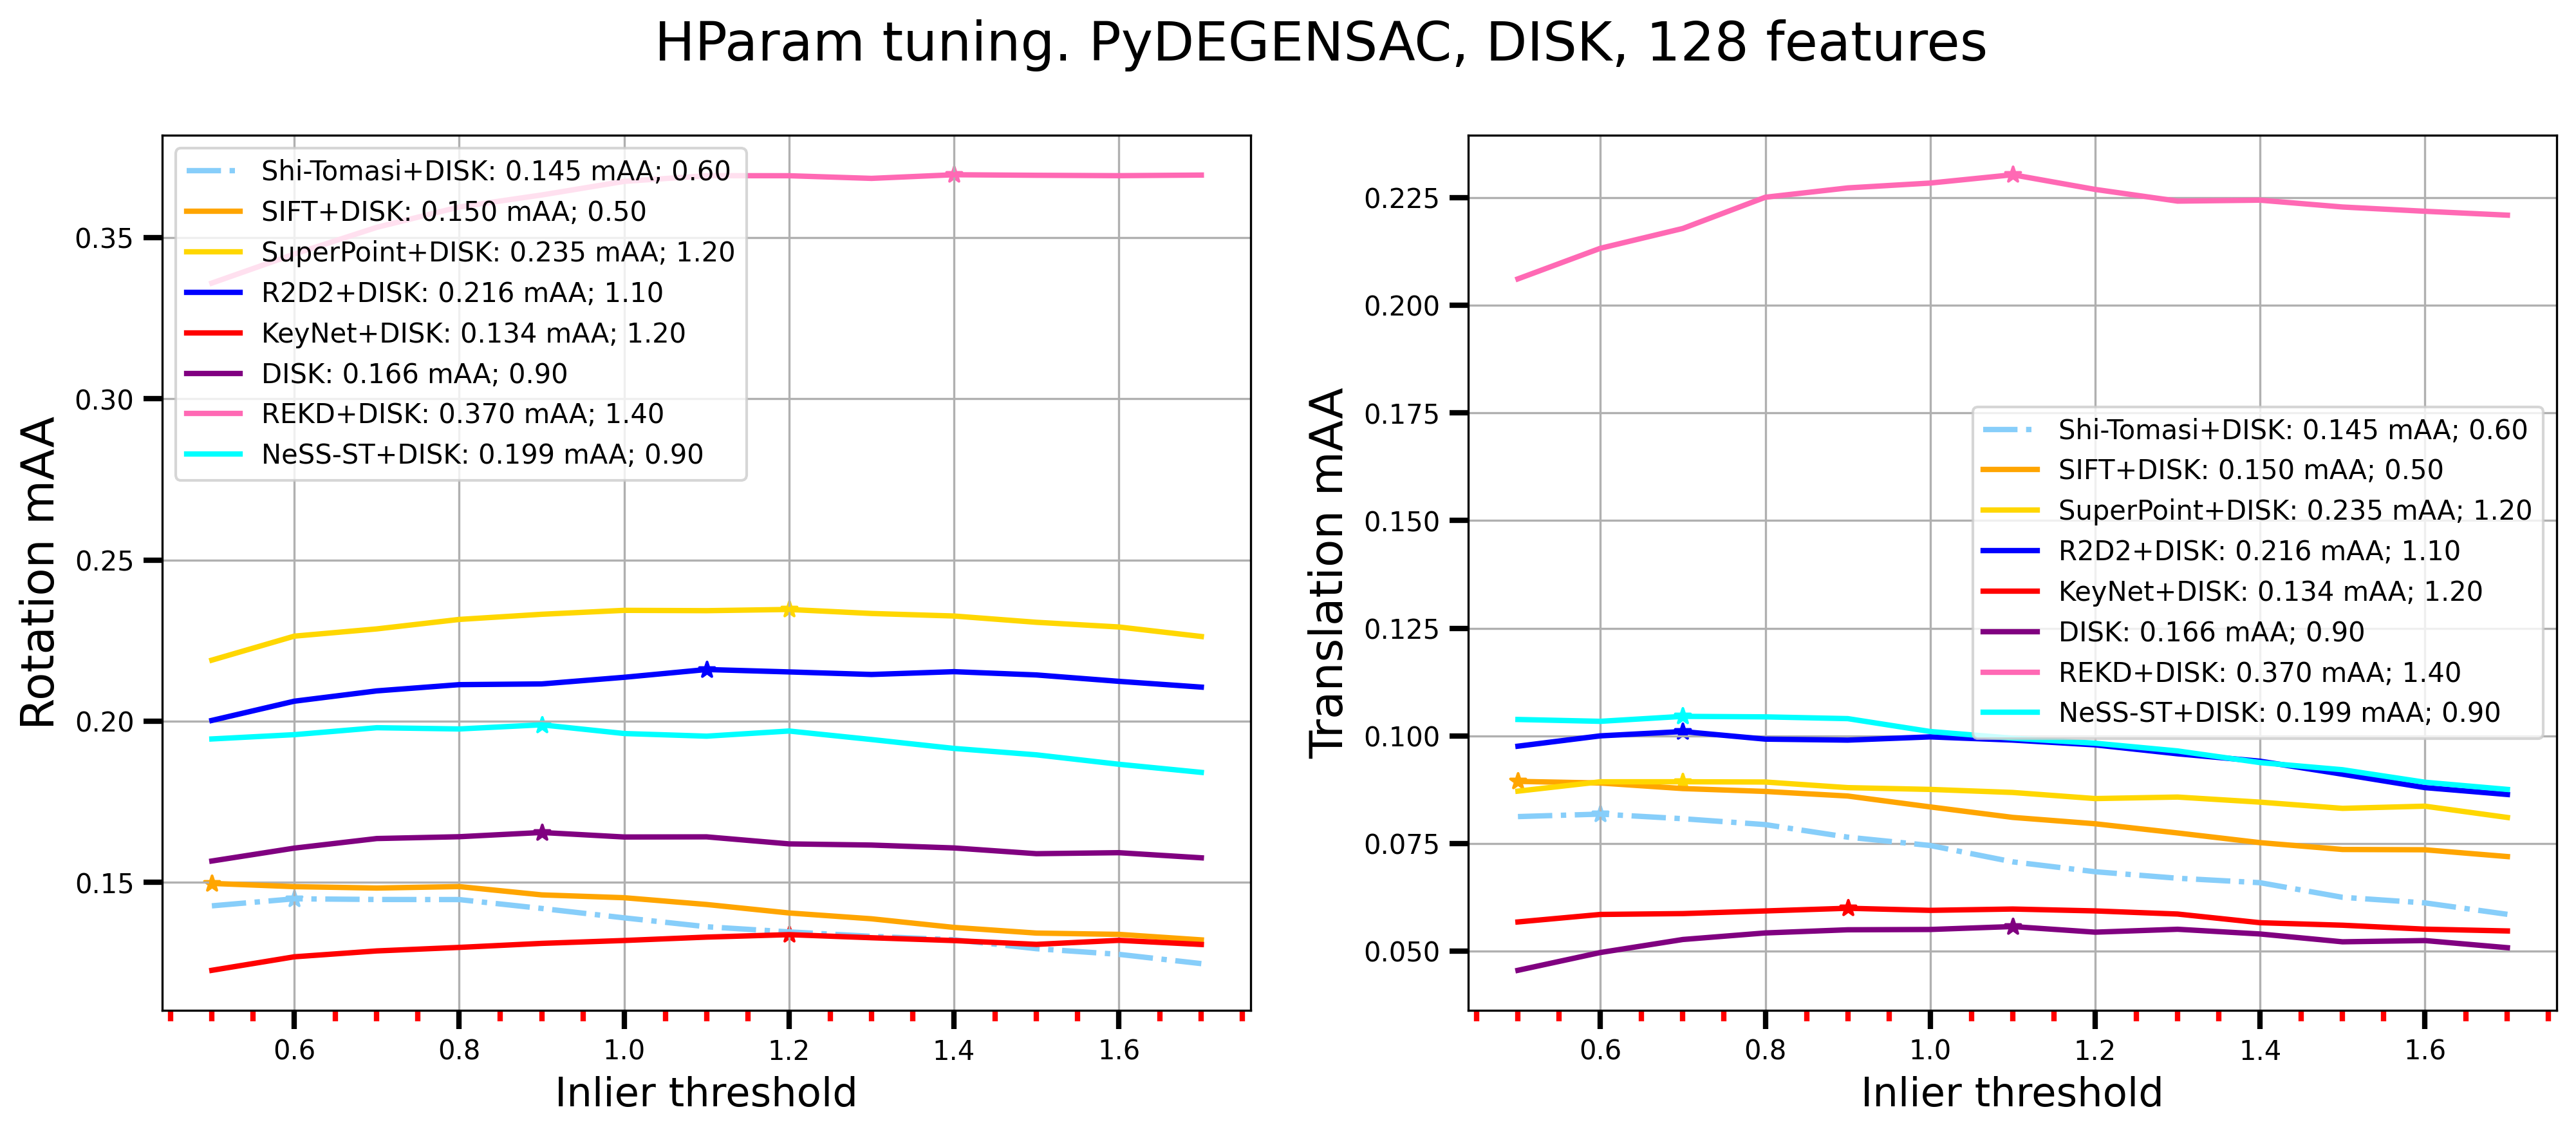

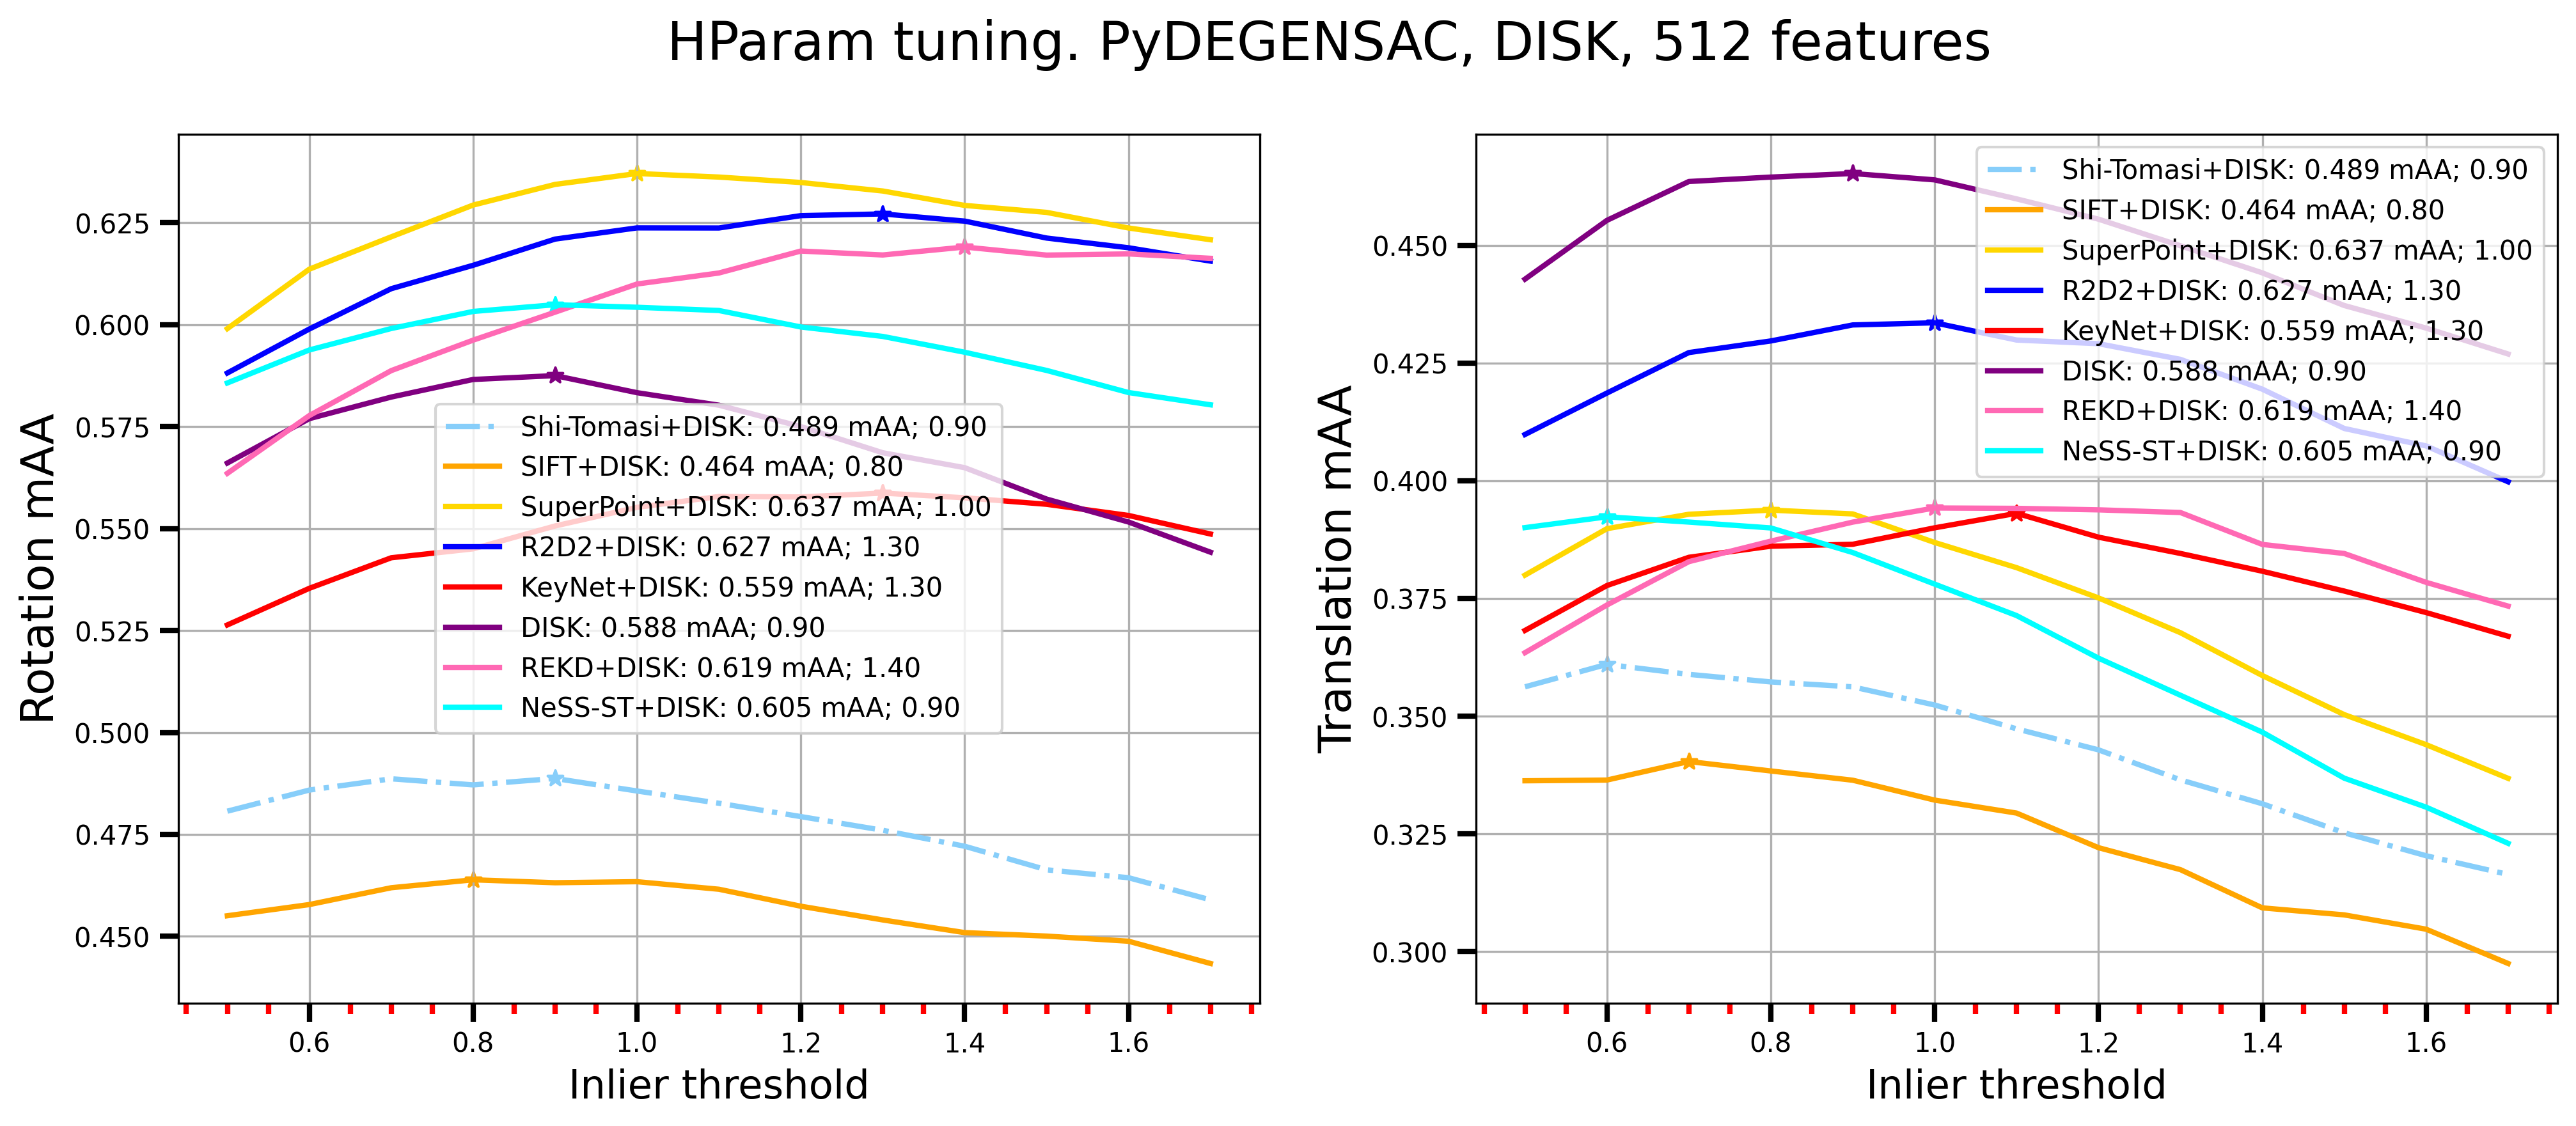

In [93]:
from source.evaluation.rel_pose.vis import HTuneRelPosemAAPlotter

HTuneRelPosemAAPlotter(methods_list,
                       eva_ns.INL_THRESH,
                       mAA_list, thresh_list,
                       vis_indices).plot_all(save)

In [94]:
from source.evaluation.rel_pose.vis import print_best_threshold

print_best_threshold(methods_list, eva_ns.INL_THRESH, mAA_list, thresh_list)

HParam tuning. PyDEGENSAC, DISK, 128 features
	 Shi-Tomasi+DISK: Inlier threshold is 0.6.
	 R: 0.145 mAA, T: 0.082 mAA

	 SIFT+DISK: Inlier threshold is 0.5.
	 R: 0.150 mAA, T: 0.089 mAA

	 SuperPoint+DISK: Inlier threshold is 1.0.
	 R: 0.234 mAA, T: 0.088 mAA

	 R2D2+DISK: Inlier threshold is 1.1.
	 R: 0.216 mAA, T: 0.099 mAA

	 KeyNet+DISK: Inlier threshold is 1.2.
	 R: 0.134 mAA, T: 0.059 mAA

	 DISK: Inlier threshold is 0.9.
	 R: 0.166 mAA, T: 0.055 mAA

	 REKD+DISK: Inlier threshold is 1.1.
	 R: 0.369 mAA, T: 0.230 mAA

	 NeSS-ST+DISK: Inlier threshold is 0.9.
	 R: 0.199 mAA, T: 0.104 mAA

HParam tuning. PyDEGENSAC, DISK, 512 features
	 Shi-Tomasi+DISK: Inlier threshold is 0.7.
	 R: 0.489 mAA, T: 0.359 mAA

	 SIFT+DISK: Inlier threshold is 0.7.
	 R: 0.462 mAA, T: 0.340 mAA

	 SuperPoint+DISK: Inlier threshold is 0.9.
	 R: 0.634 mAA, T: 0.393 mAA

	 R2D2+DISK: Inlier threshold is 1.0.
	 R: 0.624 mAA, T: 0.434 mAA

	 KeyNet+DISK: Inlier threshold is 1.1.
	 R: 0.558 mAA, T: 0.393 mAA